In [70]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [71]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [72]:
#Start with spring and work our way down to winter
season = 1
season_year = 2021
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2021-03-01 to 2021-05-31
Columns: 384 entries, 10000009 to 9000451
dtypes: float64(384)
memory usage: 276.7 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2021-03-01  0.980337  0.667495  0.484031  0.976148  0.593118  0.646985   
2021-03-02  0.954759  0.655937  0.469550  0.962617  0.580874  0.636627   
2021-03-03  0.932438  0.652354  0.455967  0.931614  0.570438  0.627798   
2021-03-04  0.914107  0.641694  0.415278  0.915709  0.557352  0.616727   
2021-03-05  0.867579  0.617485  0.388721  0.872115  0.535057  0.597866   
...              ...       ...       ...       ...       ...       ...   
2021-05-27  2.122417  0.620699  0.387260  1.224132  0.653085  0.697717   
2021-05-28  1.132168  0.523502  0.285714  1.014292  0.562451  0.621041   
2021-05-29  0.928902  0.499716  0.251453  0.903645  0.515055  0.580944   
2021-05-30  0.830596  0.470213  0.233722  0.825410  0.469039  0.542015   
2021-05-31  0.770569  0.476290  0.222215  0.785640  0.446043  0.522561   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2021-03-01  0.989046  0.965330  

          2021-03-01  2021-03-02  2021-03-03  2021-03-04  2021-03-05  \
10000009   -0.042466   -0.041593   -0.041636   -0.040983   -0.040796   
10000010   -0.073146   -0.071233   -0.069478   -0.068361   -0.066246   
10000011   -0.091138   -0.089720   -0.088999   -0.091115   -0.089526   
10000014   -0.042877   -0.040814   -0.041718   -0.040822   -0.040334   
10000016   -0.080440   -0.078678   -0.077621   -0.076837   -0.074635   
...              ...         ...         ...         ...         ...   
9000015     0.037292    0.039931    0.041689    0.042754    0.047632   
9000172    -0.038721   -0.039250   -0.040039   -0.043901   -0.046101   
9000173     0.030484    0.019580    0.011528    0.010171    0.038105   
9000293    -0.042272   -0.044546   -0.048944   -0.061548   -0.067074   
9000451    -0.033409   -0.035041   -0.036442   -0.040783   -0.044896   

          2021-03-06  2021-03-07  2021-03-08  2021-03-09  2021-03-10  ...  \
10000009   -0.040344   -0.038820   -0.038987   -0.039242  

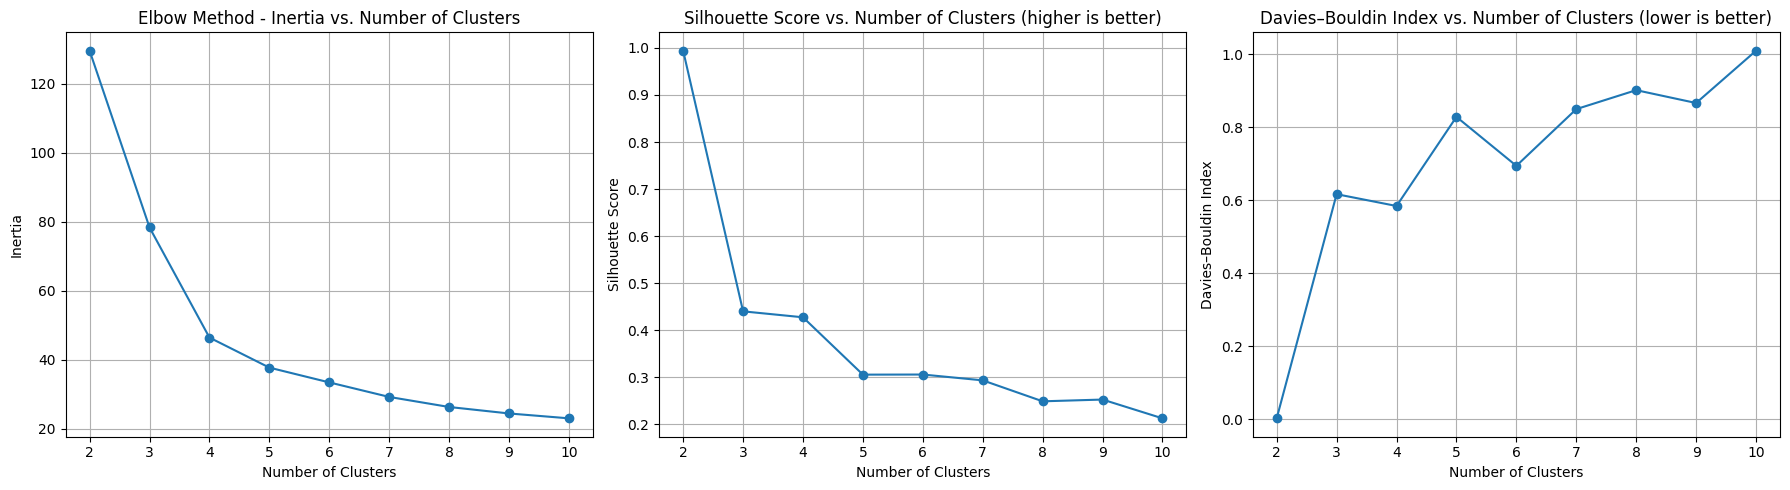

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2021-03-01  0.980337  0.667495  0.484031  0.976148  0.593118  0.646985   
2021-03-02  0.954759  0.655937  0.469550  0.962617  0.580874  0.636627   
2021-03-03  0.932438  0.652354  0.455967  0.931614  0.570438  0.627798   
2021-03-04  0.914107  0.641694  0.415278  0.915709  0.557352  0.616727   
2021-03-05  0.867579  0.617485  0.388721  0.872115  0.535057  0.597866   
...              ...       ...       ...       ...       ...       ...   
2021-05-27  2.122417  0.620699  0.387260  1.224132  0.653085  0.697717   
2021-05-28  1.132168  0.523502  0.285714  1.014292  0.562451  0.621041   
2021-05-29  0.928902  0.499716  0.251453  0.903645  0.515055  0.580944   
2021-05-30  0.830596  0.470213  0.233722  0.825410  0.469039  0.542015   
2021-05-31  0.770569  0.476290  0.222215  0.785640  0.446043  0.522561   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2021-03-01  0.989046  0.965330  

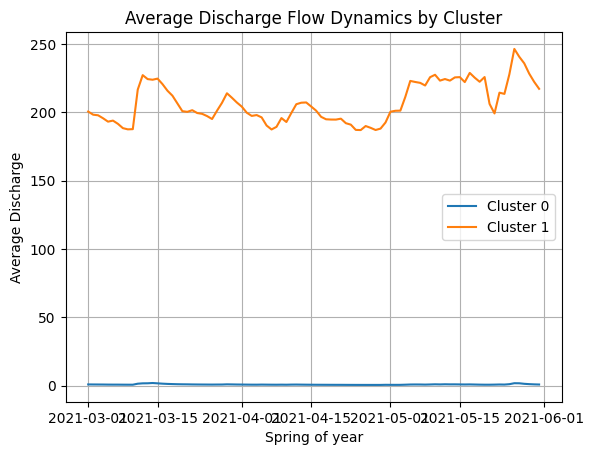

In [74]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [76]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2021-03-01  0.980337  0.667495  0.484031  0.976148  0.593118  0.646985   
2021-03-02  0.954759  0.655937  0.469550  0.962617  0.580874  0.636627   
2021-03-03  0.932438  0.652354  0.455967  0.931614  0.570438  0.627798   
2021-03-04  0.914107  0.641694  0.415278  0.915709  0.557352  0.616727   
2021-03-05  0.867579  0.617485  0.388721  0.872115  0.535057  0.597866   
...              ...       ...       ...       ...       ...       ...   
2021-05-27  2.122417  0.620699  0.387260  1.224132  0.653085  0.697717   
2021-05-28  1.132168  0.523502  0.285714  1.014292  0.562451  0.621041   
2021-05-29  0.928902  0.499716  0.251453  0.903645  0.515055  0.580944   
2021-05-30  0.830596  0.470213  0.233722  0.825410  0.469039  0.542015   
2021-05-31  0.770569  0.476290  0.222215  0.785640  0.446043  0.522561   

             1000102   1000315  11000011  11000016  ...  67000019  67000030  \
2021-03-01  0.989046  0.965330  1.837904  1.522358  ...  2.108810  0.228110   
2021-03-02  0.936593  0.919736  1.782387  1.440539  ...  1.757027  0.204796   
2021-03-03  0.896218  0.884642  1.731471  1.365850  ...  1.456307  0.189380   
2021-03-04  0.838054  0.834084  1.686367  1.271991  ...  1.322293  0.179411   
2021-03-05  0.757365  0.763948  1.623315  1.200398  ...  1.210607  0.159038   
...              ...       ...       ...       ...  ...       ...       ...   
2021-05-27  0.304735  0.370510  1.051214  1.679496  ...  0.217861  0.047952   
2021-05-28  0.284963  0.353324  1.065541  1.218310  ...  0.198303  0.042688   
2021-05-29  0.273666  0.343504  1.058097  1.023781  ...  0.182753  0.038834   
2021-05-30  0.262121  0.333469  1.031501  0.897386  ...  0.152473  0.038380   
2021-05-31  0.255504  0.327717  1.002771  0.827065  ...  0.133697  0.035876   

             7000003   7000333   8000001   9000015   9000172   9000173  \
2021-03-01  1.178329  0.794720  1.396553  1.793622  1.018519  1.724204   
2021-03-02  1.097341  0.760622  1.318623  1.776687  0.978382  1.571501   
2021-03-03  1.030849  0.734761  1.250179  1.770692  0.948510  1.467275   
2021-03-04  0.961665  0.693435  1.172056  1.747330  0.885078  1.423116   
2021-03-05  0.851757  0.633476  1.054149  1.736529  0.815445  1.642916   
...              ...       ...       ...       ...       ...       ...   
2021-05-27  0.764574  0.824927  1.293766  1.747037  0.729329  1.463837   
2021-05-28  0.577136  0.664048  0.997073  1.474033  0.643890  1.466553   
2021-05-29  0.479514  0.579153  0.837015  1.368751  0.605756  1.471840   
2021-05-30  0.411782  0.519289  0.730901  1.296675  0.572281  1.428385   
2021-05-31  0.367530  0.481641  0.662158  1.236406  0.565427  1.545814   

             9000293   9000451  
2021-03-01  0.982311  1.072687  
2021-03-02  0.924988  1.020822  
2021-03-03  0.858927  0.984689  
2021-03-04  0.709480  0.916105  
2021-03-05  0.609353  0.827293  
...              ...       ...  
2021-05-27  2.104024  1.228467  
2021-05-28  1.781933  0.859536  
2021-05-29  1.498063  0.669179  
2021-05-30  1.257316  0.558592  
2021-05-31  1.077668  0.507393  

[92 rows x 384 columns]

<Axes: >

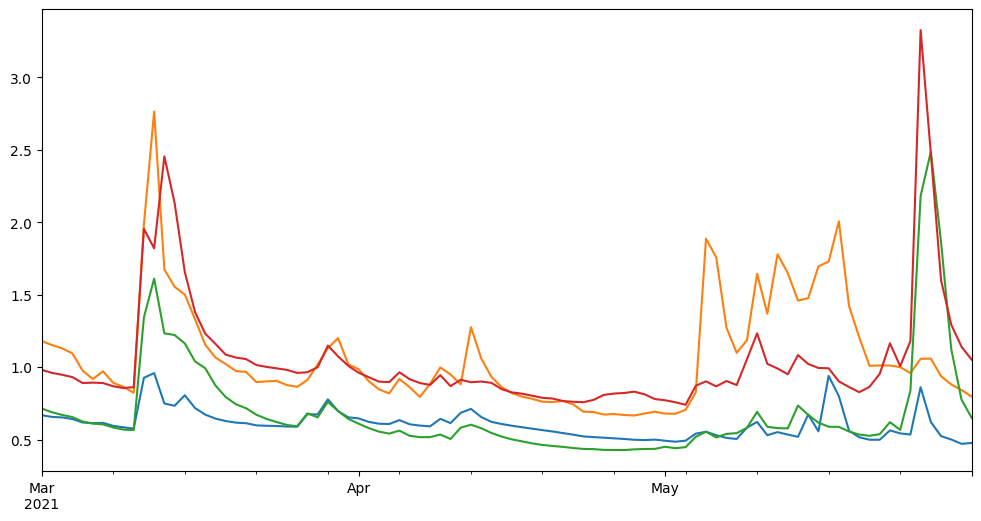

In [77]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

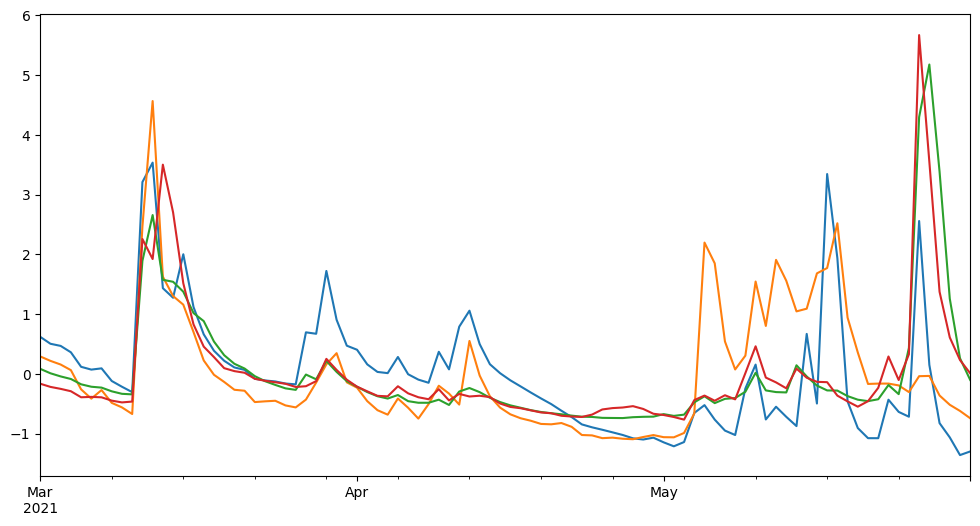

In [78]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

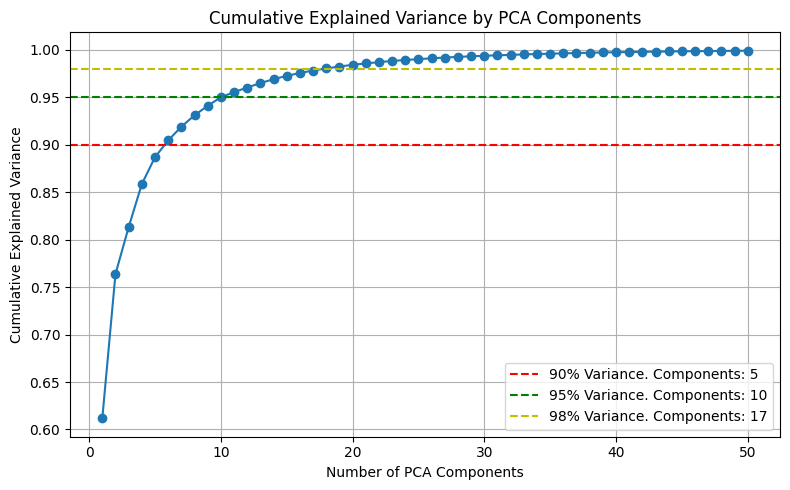

In [79]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [80]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[  3.23560896,  -5.51095259,   0.55855534, ...,   0.02007572,
         -0.61617167,   0.26581815],
       [  1.37101483,  -4.92735936,   0.62557879, ...,  -0.15530402,
         -0.40789589,   0.30807194],
       [  0.22142524,  -4.52847709,   0.73629892, ...,  -0.22793654,
         -0.50056339,   0.30191999],
       ...,
       [ 11.55902369,   9.50291951, -15.40619925, ...,  -0.17271455,
          0.22241317,  -0.13299936],
       [  3.40868443,   7.13668626, -13.01611078, ...,   0.40407152,
          0.98434896,   0.45861611],
       [ -1.81971648,   5.79352252, -10.87022817, ...,   0.87743932,
          1.60395594,   0.79262837]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37396\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


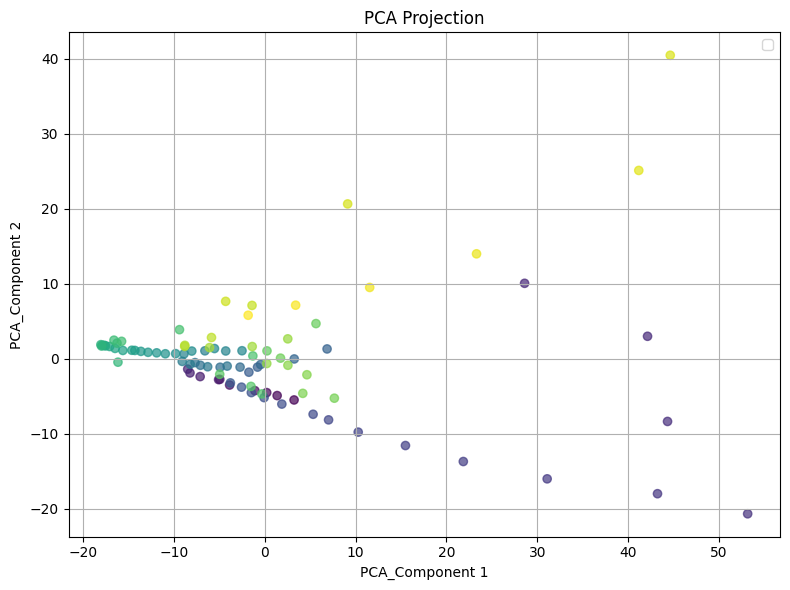

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37396\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


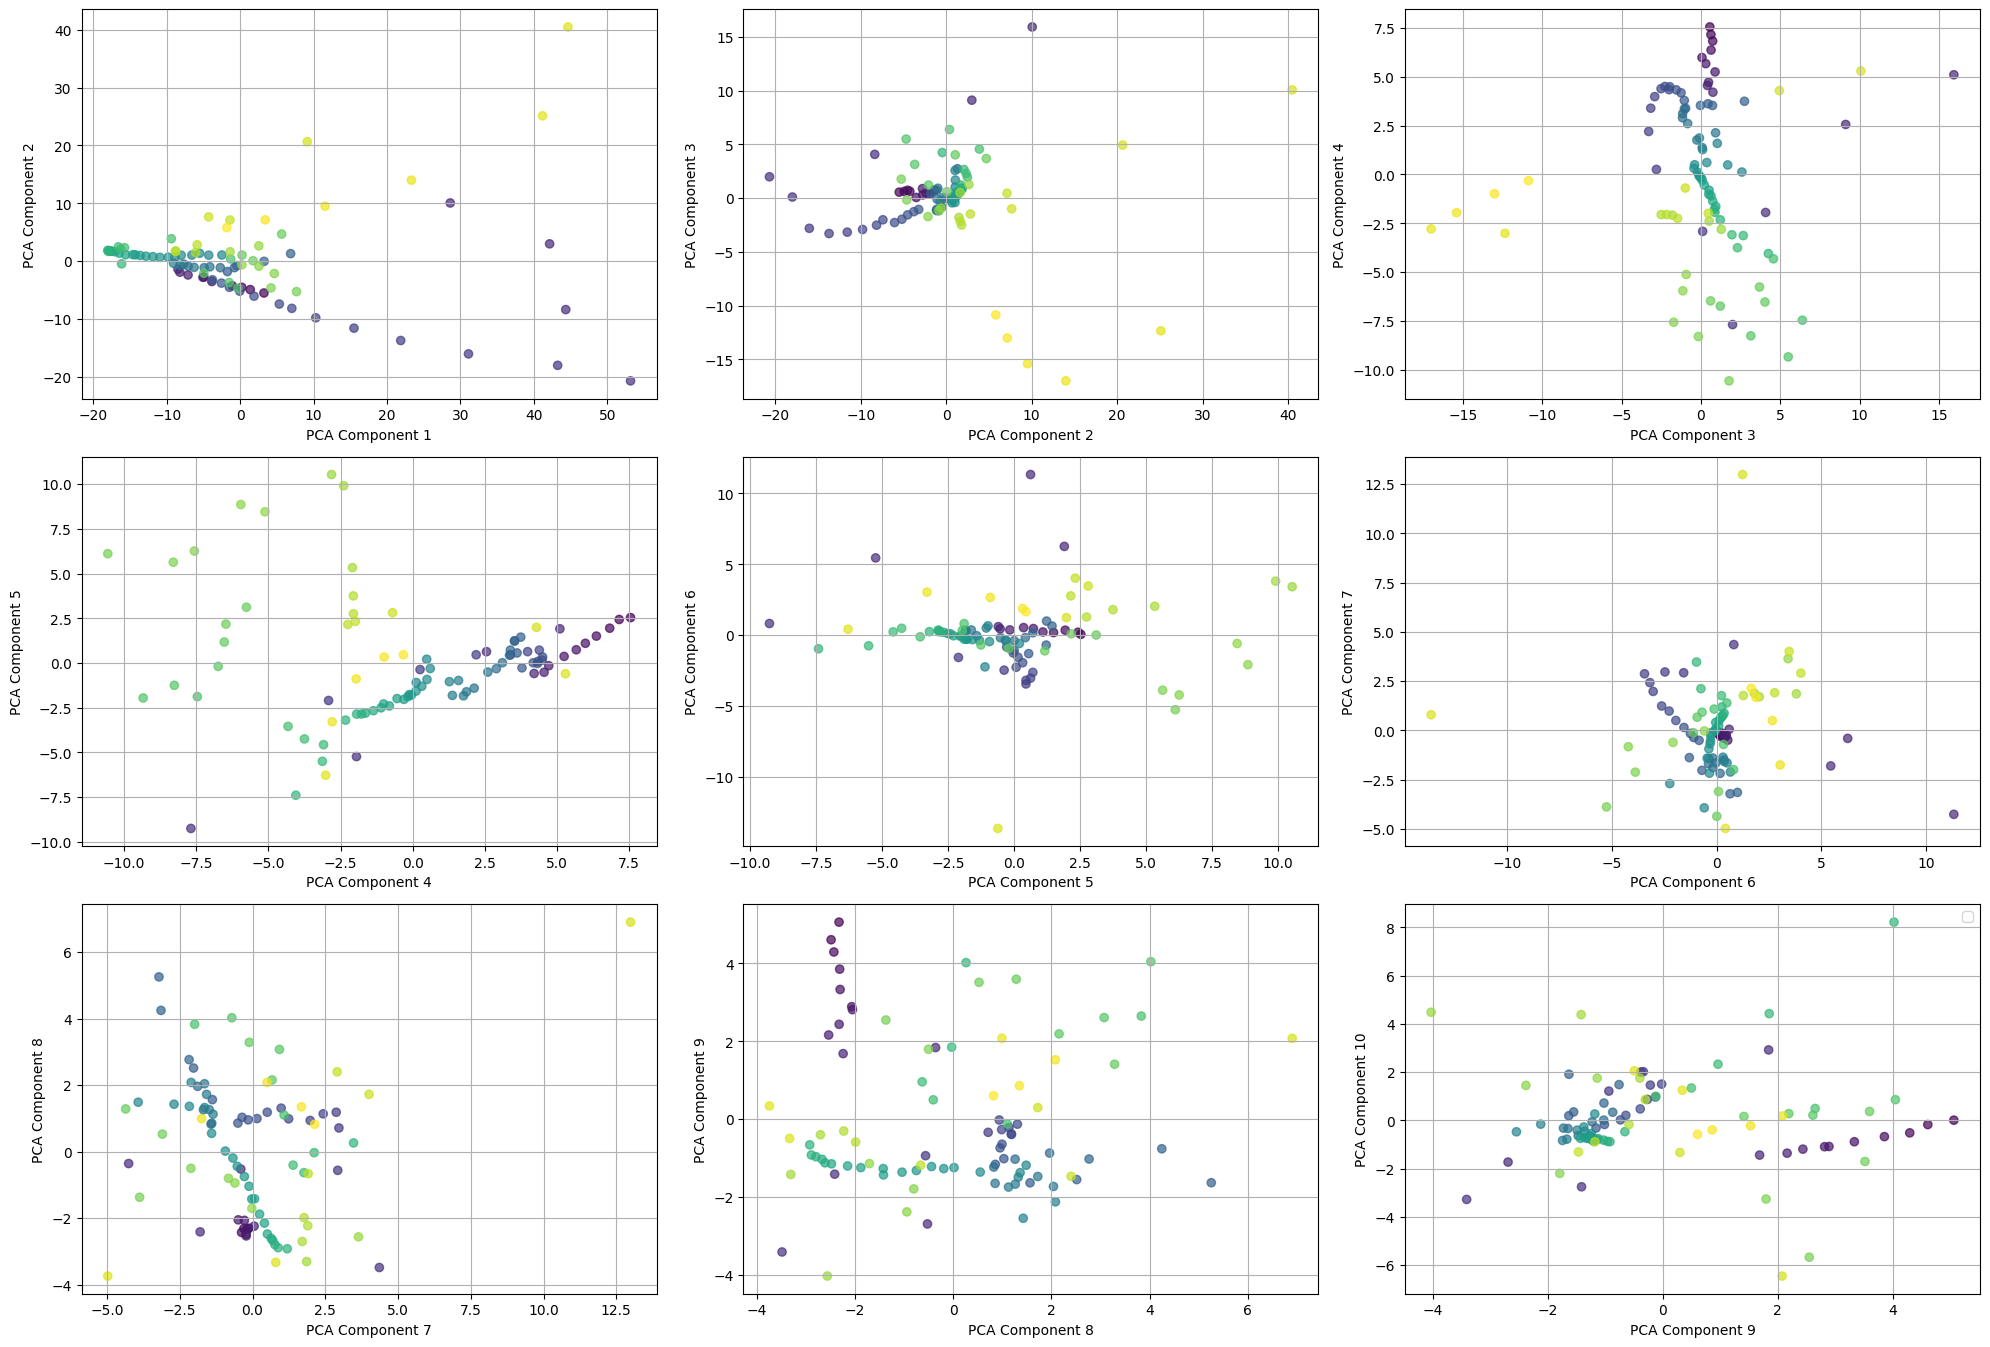

In [82]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [83]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.567
KMeans Davies-Bouldin Index is 0.724


<Axes: xlabel='k'>

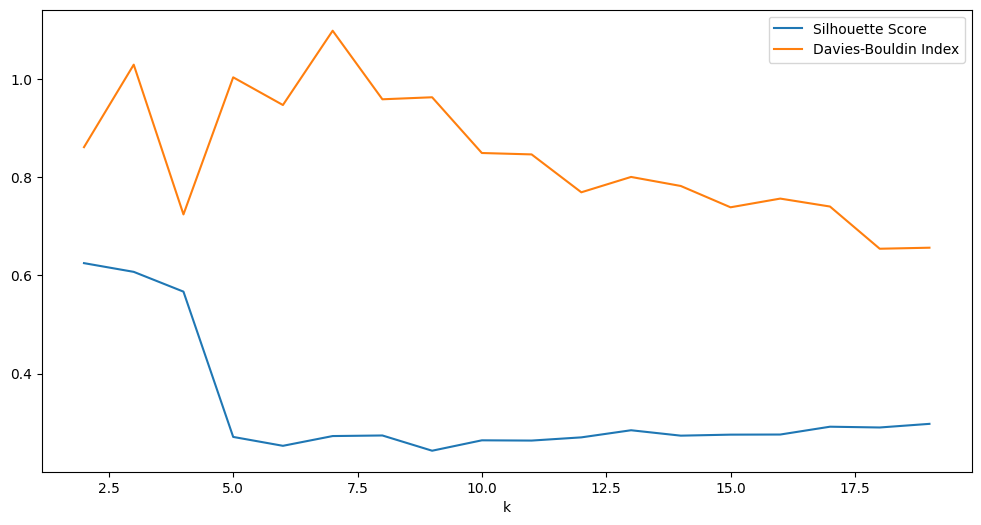

In [84]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         1     89               NaN   
1    0.76            3         1     87               NaN   
2    1.01            3         2     82         -0.101222   
3    1.27            3         2     78         -0.072141   
4    1.52            3         1     77               NaN   
5    1.78            3         4     68         -0.124072   
6    2.03            3         5     64         -0.083463   
7    2.29            3         6     59         -0.068999   
8    2.54            3         6     53         -0.025222   
9    2.80            3         6     53         -0.025222   
10   3.05            3         6     52         -0.021173   
11   3.31            3         3     49         -0.014561   
12   3.56            3         4     44         -0.061329   
13   3.82            3         3     44         -0.051272   
14   4.07            3         4     39         -0.061418   
15   4.33            3         4     37         -0.066367   
16   4.58            3         4     37         -0.066367   
17   4.84            3         4     35         -0.057403   
18   5.09            3         4     34         -0.050468   
19   5.35            3         3     34         -0.022168   
20   5.60            3         3     33         -0.027524   
21   5.86            3         3     32         -0.041786   
22   6.11            3         4     29         -0.025569   
23   6.37            3         3     29         -0.035802   
24   6.62            3         3     29         -0.035802   
25   6.88            3         4     26         -0.023911   
26   7.13            3         4     25         -0.041175   
27   7.39            3         4     23         -0.031908   
28   7.64            3         4     21          0.038341   
29   7.90            3         4     21          0.038341   
30   8.15            3         3     18          0.136928   
31   8.41            3         3     15          0.156602   
32   8.66            3         3     15          0.156602   
33   8.92            3         3     13          0.177195   
34   9.17            3         3     13          0.177195   
35   9.43            3         4     10          0.204414   
36   9.68            3         4     10          0.204414   
37   9.94            3         3     10          0.173114   
38  10.19            3         3      9          0.154656   
39  10.45            3         2      9          0.293888   
40  10.70            3         2      9          0.293888   
41  10.96            3         2      9          0.293888   
42  11.21            3         2      9          0.293888   
43  11.47            3         2      9          0.293888   
44  11.72            3         2      9          0.293888   
45  11.98            3         2      9          0.293888   
46  12.23            3         2      9          0.293888   
47  12.49            3         2      9          0.293888   
48  12.74            3         2      9          0.293888   
49  13.00            3         1      9               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               0.968284  
3               0.996934  
4                    NaN  
5               1.590016  
6               1.576870  
7               1.523005  
8               1.552894  
9               1.552894  
10              1.575549  
11              1.691045  
12              1.420651  
13              1.357868  
14              1.313803  
15              1.335825  
16              1.335825  
17              1.351308  
18              1.336409  
19              1.458890  
20              1.483003  
21              1.545817  
22              1.502576  
23              1.506905  
24              1.506905  
25              1.569774  
26              1.595258  
27              1.525159  
28              1.528377  
29              1.528377  
30              1.337275  
31              1.310312  
32 

<Axes: xlabel='eps'>

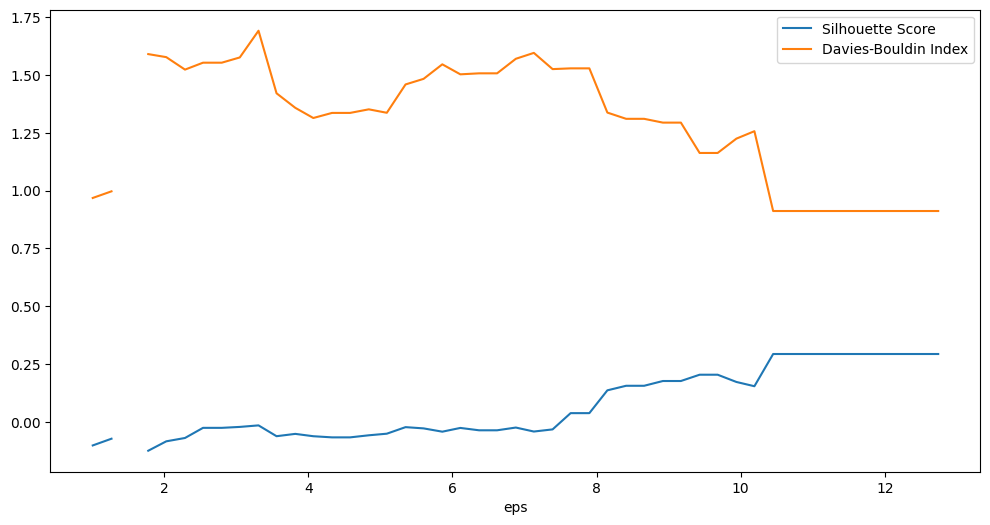

In [85]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

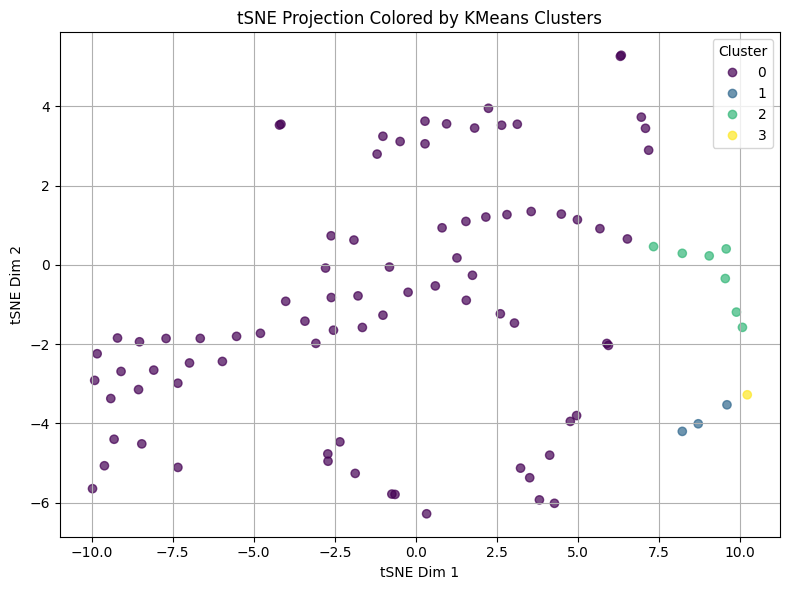

In [86]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        37    245          0.369125   
1    0.05            2        41    220          0.328394   
2    0.06            2        42    201          0.273928   
3    0.06            2        41    182          0.233368   
4    0.07            2        36    170          0.229455   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.779528   
196  0.99            2         2      2          0.779528   
197  0.99            2         2      2          0.779528   
198  1.00            2         2      2          0.779528   
199  1.00            2         2      2          0.779528   

     Davies-Bouldin Index  
0                0.536585  
1                0.559963  
2                0.617588  
3                0.588508  
4                0.585512  
..                    ...  
195              0.273490  
196              0.273490  
197              0.273490  
198              0.273490  
199              0.273490  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

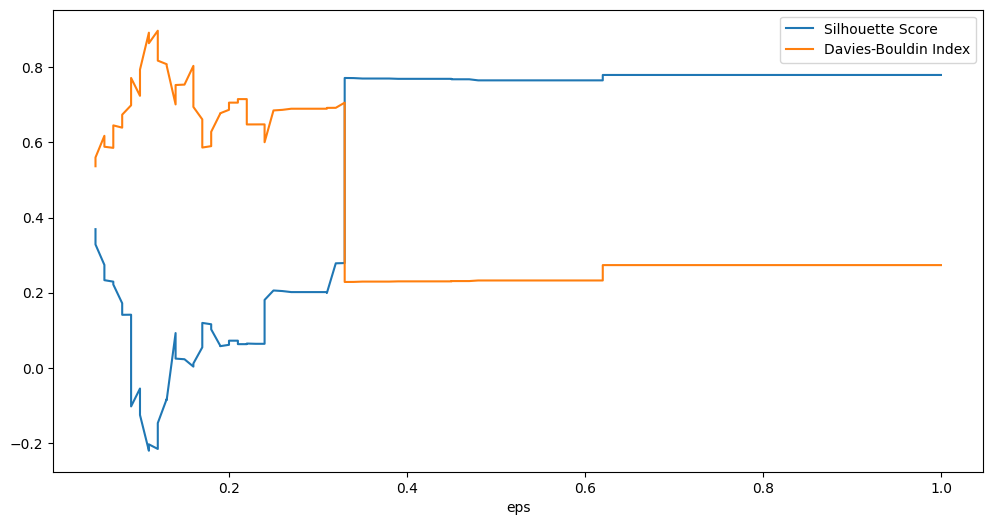

In [87]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [88]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [89]:
#Start with spring and work our way down to winter
season = 2
season_year = 2021
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2021-06-01 to 2021-08-31
Columns: 374 entries, 10000009 to 9000451
dtypes: float64(374)
memory usage: 269.5 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2021-06-01  0.731405  0.469291  0.210721  0.759072  0.443034  0.520015   
2021-06-02  0.702677  0.465181  0.200266  0.733798  0.425417  0.505111   
2021-06-03  0.687856  0.469473  0.197873  0.722064  0.423768  0.503716   
2021-06-04  0.706644  0.480966  0.189536  0.731502  0.411879  0.493658   
2021-06-05  0.665942  0.476936  0.183993  0.693377  0.393338  0.477972   
...              ...       ...       ...       ...       ...       ...   
2021-08-27  0.535218  0.419314  0.079265  0.508266  0.279212  0.381423   
2021-08-28  0.534046  0.420364  0.081423  0.502789  0.280115  0.382187   
2021-08-29  0.530552  0.423060  0.082193  0.496547  0.277474  0.379952   
2021-08-30  0.522910  0.418870  0.082697  0.511953  0.271548  0.374939   
2021-08-31  0.511495  0.411892  0.083055  0.628988  0.265496  0.369819   

             1000102   1000315  11000011  11000016  ...  67000018  67000019  \
2021-06-01  0.247809  0.321028  

          2021-06-01  2021-06-02  2021-06-03  2021-06-04  2021-06-05  \
10000009   -0.055479   -0.053283   -0.065661   -0.056893   -0.053637   
10000010   -0.079566   -0.075796   -0.085049   -0.077190   -0.071124   
10000011   -0.103327   -0.100909   -0.109161   -0.103399   -0.098226   
10000014   -0.052937   -0.050332   -0.062624   -0.054658   -0.051099   
10000016   -0.081979   -0.079566   -0.089107   -0.083403   -0.078858   
...              ...         ...         ...         ...         ...   
8000001    -0.066533   -0.066253   -0.079241   -0.073911   -0.070415   
9000015    -0.012047   -0.007332   -0.020761    0.070310    0.047983   
9000172    -0.072263   -0.069591   -0.076045   -0.066089   -0.064188   
9000293    -0.037187   -0.042951   -0.017779   -0.037102   -0.041621   
9000451    -0.078150   -0.079962   -0.090508   -0.061943   -0.060506   

          2021-06-06  2021-06-07  2021-06-08  2021-06-09  2021-06-10  ...  \
10000009   -0.052301   -0.052073   -0.050039   -0.048325  

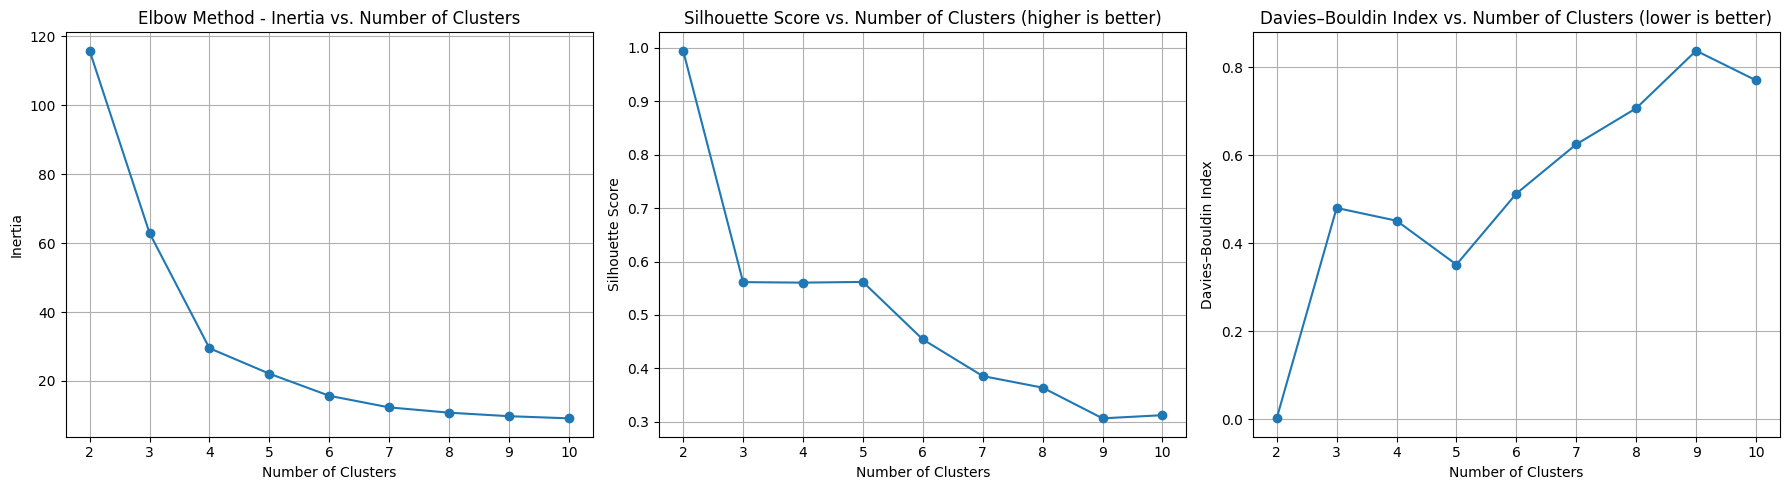

In [90]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2021-06-01  0.731405  0.469291  0.210721  0.759072  0.443034  0.520015   
2021-06-02  0.702677  0.465181  0.200266  0.733798  0.425417  0.505111   
2021-06-03  0.687856  0.469473  0.197873  0.722064  0.423768  0.503716   
2021-06-04  0.706644  0.480966  0.189536  0.731502  0.411879  0.493658   
2021-06-05  0.665942  0.476936  0.183993  0.693377  0.393338  0.477972   
...              ...       ...       ...       ...       ...       ...   
2021-08-27  0.535218  0.419314  0.079265  0.508266  0.279212  0.381423   
2021-08-28  0.534046  0.420364  0.081423  0.502789  0.280115  0.382187   
2021-08-29  0.530552  0.423060  0.082193  0.496547  0.277474  0.379952   
2021-08-30  0.522910  0.418870  0.082697  0.511953  0.271548  0.374939   
2021-08-31  0.511495  0.411892  0.083055  0.628988  0.265496  0.369819   

             1000102   1000315  11000011  11000016  ...  67000018  67000019  \
2021-06-01  0.247809  0.321028  

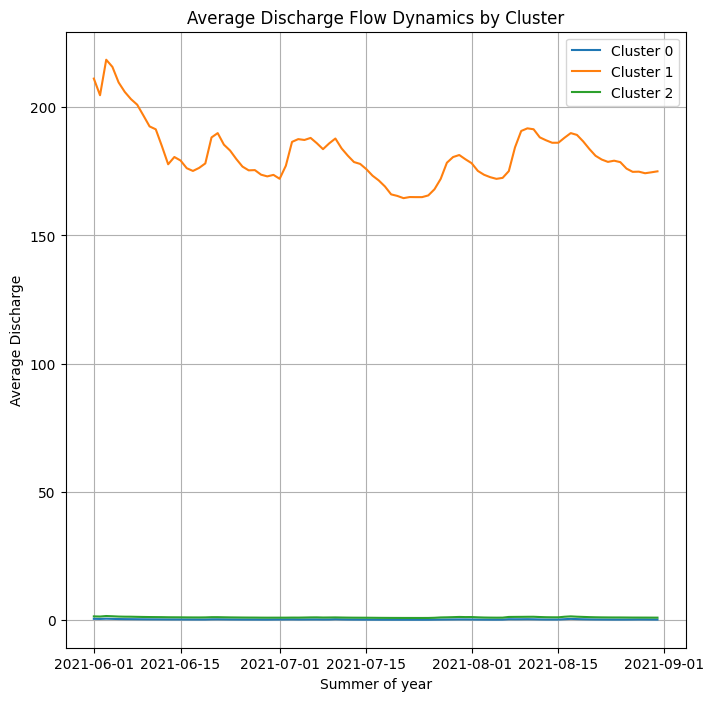

In [91]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [93]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2021-06-01  0.731405  0.469291  0.210721  0.759072  0.443034  0.520015   
2021-06-02  0.702677  0.465181  0.200266  0.733798  0.425417  0.505111   
2021-06-03  0.687856  0.469473  0.197873  0.722064  0.423768  0.503716   
2021-06-04  0.706644  0.480966  0.189536  0.731502  0.411879  0.493658   
2021-06-05  0.665942  0.476936  0.183993  0.693377  0.393338  0.477972   
...              ...       ...       ...       ...       ...       ...   
2021-08-27  0.535218  0.419314  0.079265  0.508266  0.279212  0.381423   
2021-08-28  0.534046  0.420364  0.081423  0.502789  0.280115  0.382187   
2021-08-29  0.530552  0.423060  0.082193  0.496547  0.277474  0.379952   
2021-08-30  0.522910  0.418870  0.082697  0.511953  0.271548  0.374939   
2021-08-31  0.511495  0.411892  0.083055  0.628988  0.265496  0.369819   

             1000102   1000315  11000011  11000016  ...  67000018  67000019  \
2021-06-01  0.247809  0.321028  0.976206  0.775149  ...  0.085111  0.120063   
2021-06-02  0.238966  0.313342  0.947816  0.739247  ...  0.077661  0.103196   
2021-06-03  0.232600  0.307809  0.938164  0.784466  ...  0.068824  0.090392   
2021-06-04  0.227021  0.302959  0.923802  0.787512  ...  0.062644  0.079297   
2021-06-05  0.217680  0.294839  0.901657  0.731934  ...  0.059067  0.067763   
...              ...       ...       ...       ...  ...       ...       ...   
2021-08-27  0.121871  0.211560  0.604052  0.575805  ...  0.021090  0.026396   
2021-08-28  0.121784  0.211484  0.581609  0.559724  ...  0.138745  0.065604   
2021-08-29  0.121772  0.211474  0.566985  0.547697  ...  0.093755  0.081412   
2021-08-30  0.120312  0.210205  0.553704  0.537367  ...  0.051893  0.068725   
2021-08-31  0.118636  0.208748  0.545444  0.526331  ...  0.031407  0.042773   

            67000030   7000003   7000333   8000001   9000015   9000172  \
2021-06-01  0.027903  0.334490  0.452405  0.611114  1.204037  0.548766   
2021-06-02  0.026681  0.303509  0.426633  0.565850  1.187403  0.530641   
2021-06-03  0.027718  0.284353  0.415116  0.534890  1.193613  0.570893   
2021-06-04  0.043120  0.269182  0.394471  0.517421  2.121043  0.604395   
2021-06-05  0.049140  0.248279  0.371472  0.484594  1.764325  0.551906   
...              ...       ...       ...       ...       ...       ...   
2021-08-27  0.072107  0.164201  0.124088  0.227077  0.832206  0.292205   
2021-08-28  0.200546  0.165796  0.124931  0.236266  0.829604  0.314283   
2021-08-29  0.073909  0.166628  0.122164  0.236309  0.827775  0.363820   
2021-08-30  0.046057  0.166742  0.117982  0.238062  0.831458  0.340727   
2021-08-31  0.047966  0.165932  0.114028  0.237492  0.831494  0.320942   

             9000293   9000451  
2021-06-01  0.930462  0.484696  
2021-06-02  0.811661  0.421238  
2021-06-03  1.227193  0.407980  
2021-06-04  0.926711  0.650495  
2021-06-05  0.795819  0.591701  
...              ...       ...  
2021-08-27  0.053454  0.098042  
2021-08-28  0.050388  0.093694  
2021-08-29  0.048985  0.088724  
2021-08-30  0.044372  0.085502  
2021-08-31  0.041099  0.081708  

[92 rows x 374 columns]

<Axes: >

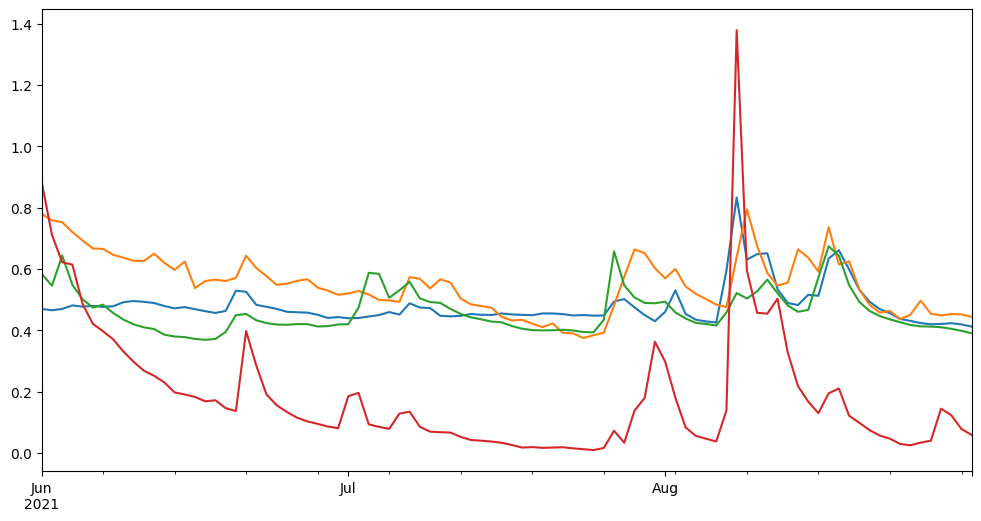

In [94]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

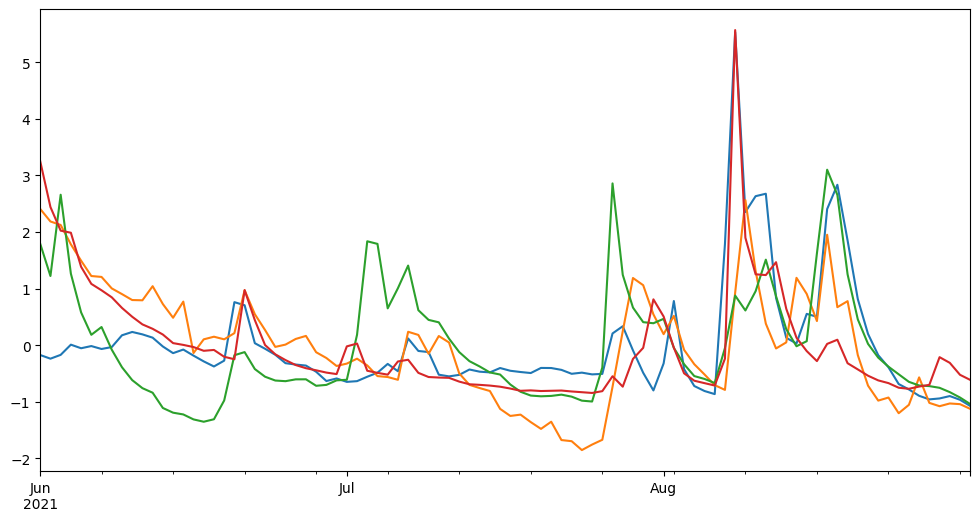

In [95]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

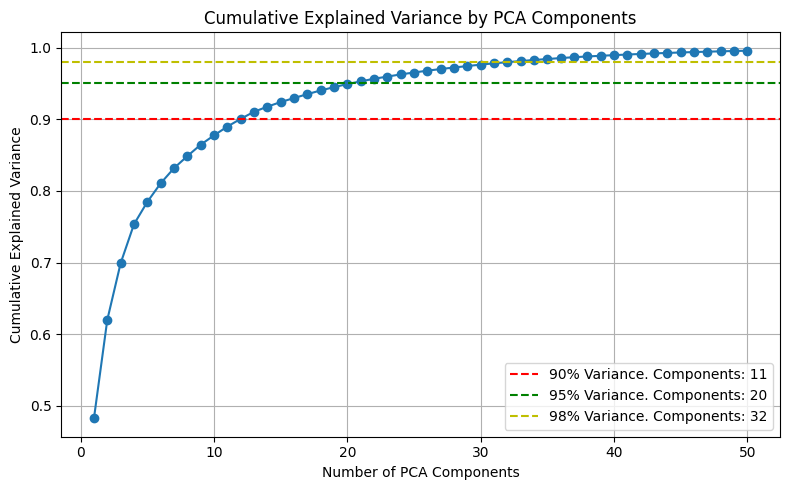

In [96]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 44.05465422, -10.41666705,   2.09786995, ...,   0.11529859,
          1.7929704 ,   0.7082082 ],
       [ 36.36407419,  -9.61772436,   1.89252482, ...,   0.08053722,
          1.38175534,   0.76841395],
       [ 49.17453682,  -7.3190011 ,  -5.24351879, ...,  -1.91497571,
          1.61529803,  -1.35157913],
       ...,
       [ -6.10631867,   1.23258593,   7.63107532, ...,  -1.58000005,
         -0.29058677,   0.99154034],
       [ -8.0163456 ,   0.14267273,   4.50298354, ...,  -1.41686367,
         -0.20242483,  -0.54588437],
       [ -9.98142698,  -0.5378455 ,   2.18992258, ...,  -0.82400753,
         -0.09218402,  -0.73387307]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37396\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


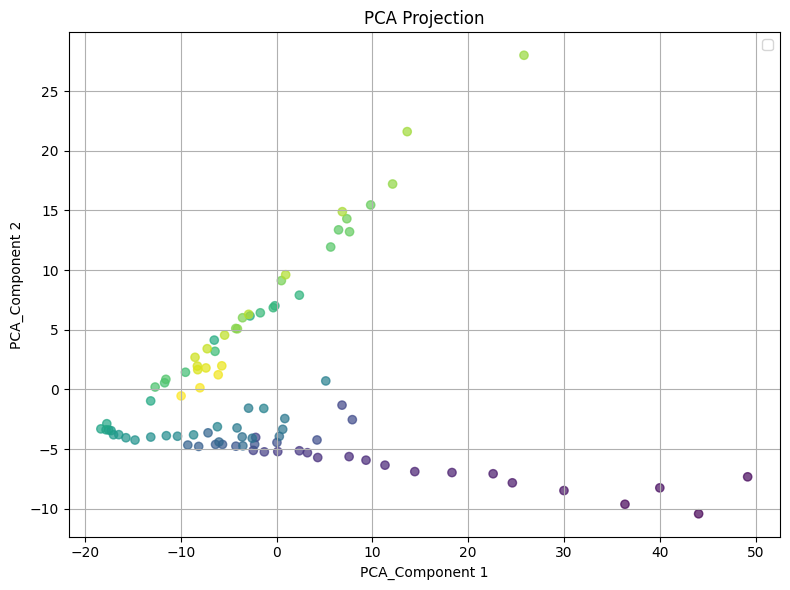

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37396\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


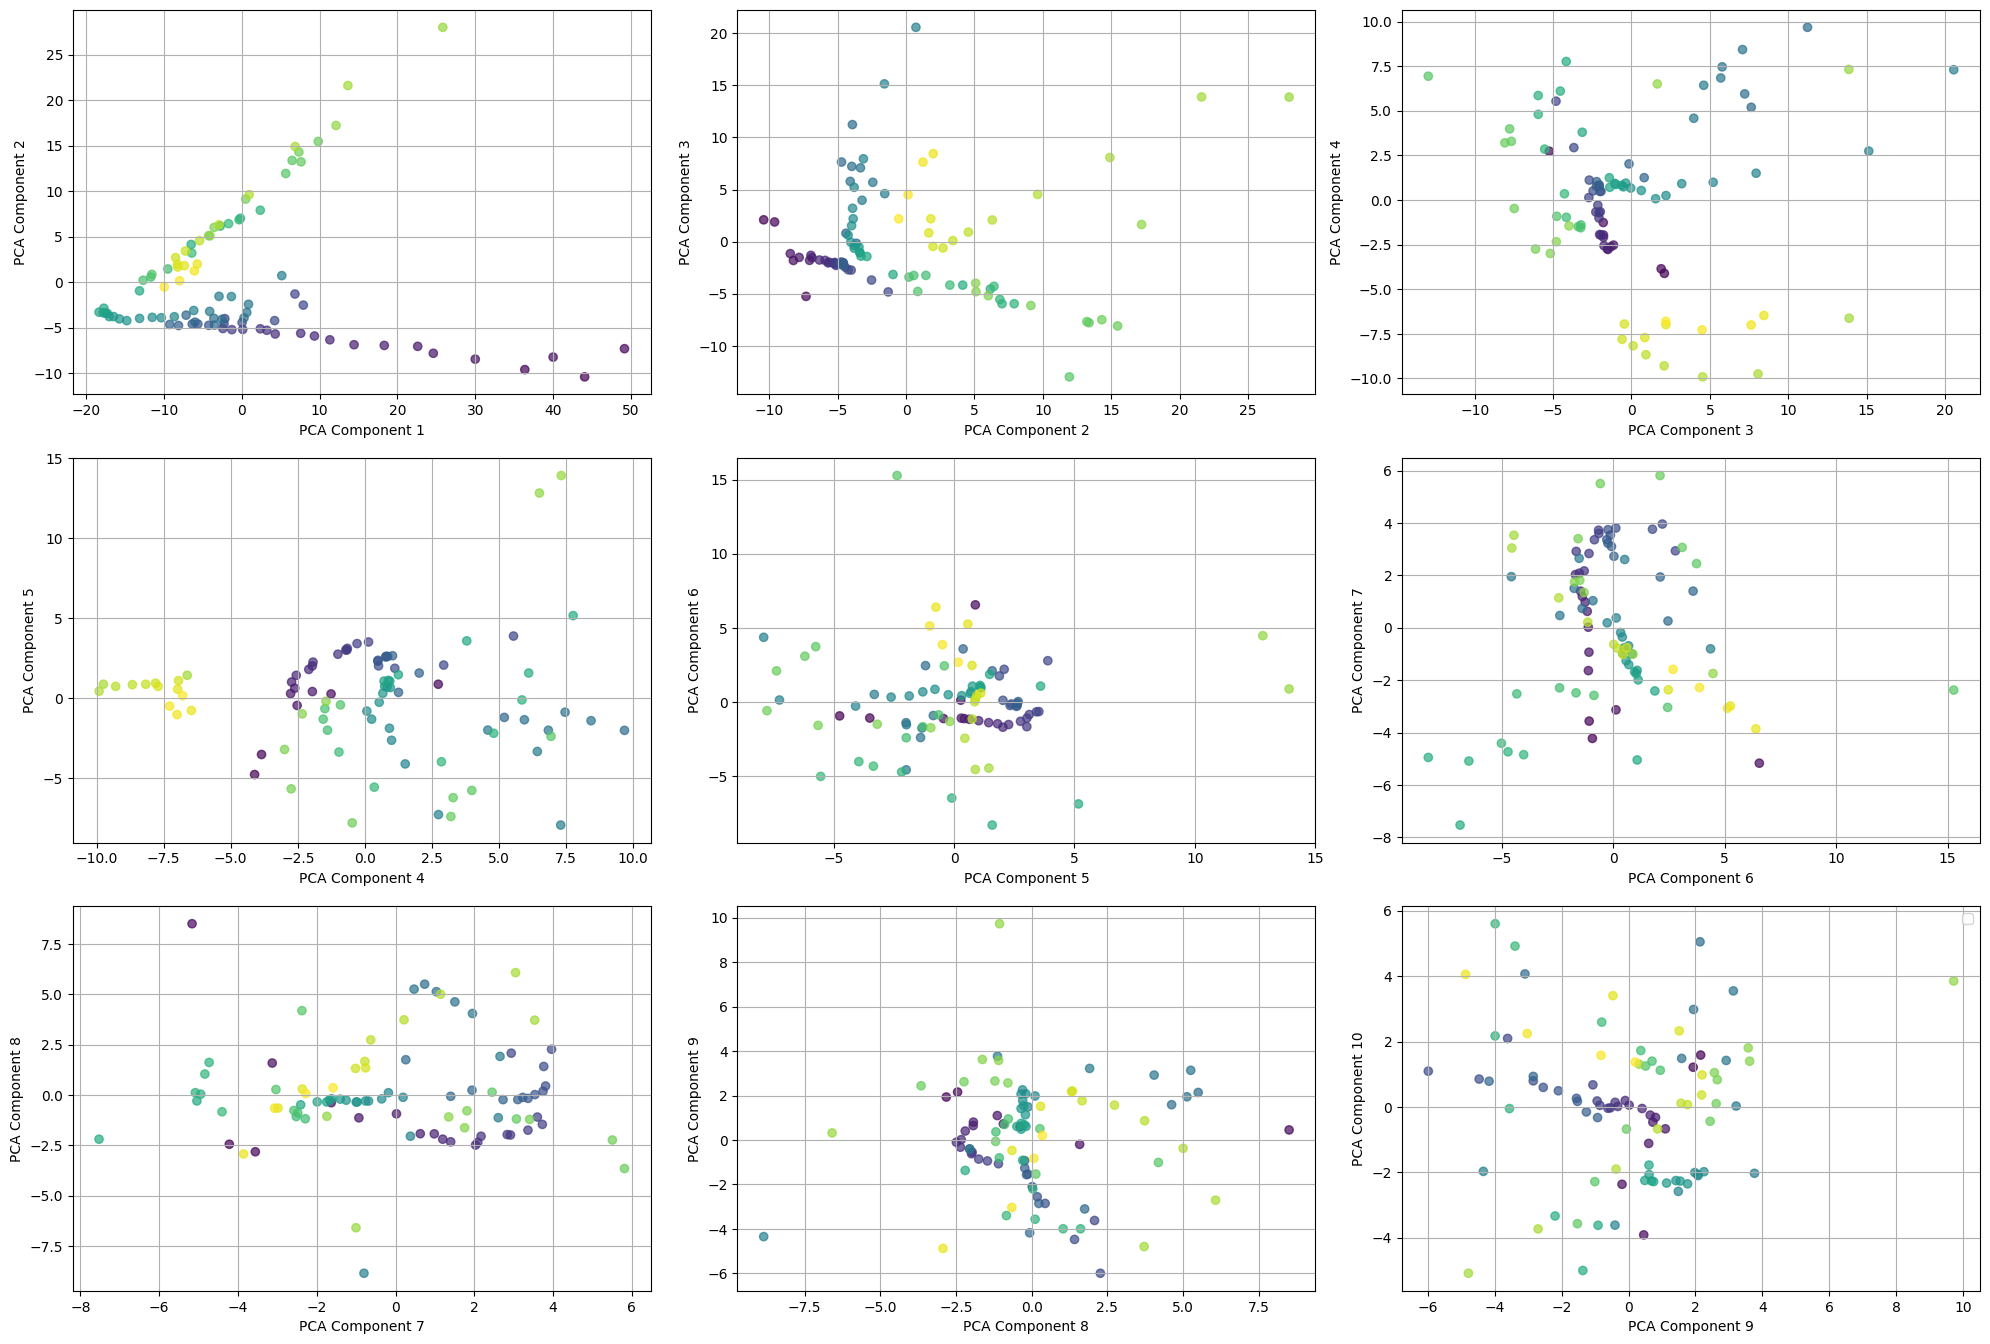

In [99]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [100]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.237
KMeans Davies-Bouldin Index is 1.454


<Axes: xlabel='k'>

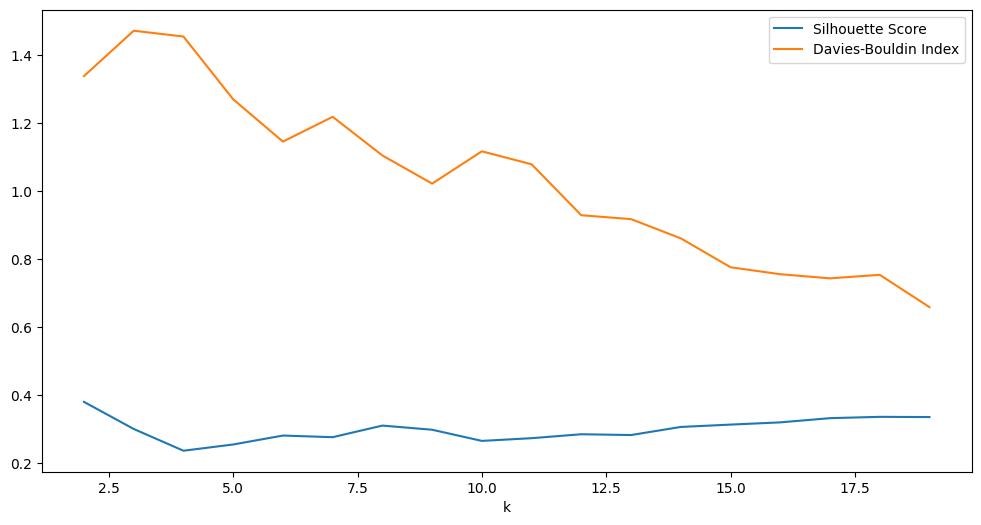

In [101]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         1     88               NaN   
4    1.52            3         2     85         -0.046274   
5    1.78            3         2     81         -0.166461   
6    2.03            3         4     71         -0.098467   
7    2.29            3         6     65         -0.071932   
8    2.54            3         5     61         -0.053611   
9    2.80            3         5     61         -0.053611   
10   3.05            3         6     56         -0.024802   
11   3.31            3         6     55         -0.020683   
12   3.56            3         5     54         -0.006754   
13   3.82            3         6     51          0.008602   
14   4.07            3         6     49          0.020690   
15   4.33            3         6     48          0.027694   
16   4.58            3         6     47          0.024228   
17   4.84            3         6     42          0.064766   
18   5.09            3         6     40          0.081311   
19   5.35            3         6     38          0.099513   
20   5.60            3         6     37          0.104368   
21   5.86            3         6     33          0.106935   
22   6.11            3         6     30          0.108638   
23   6.37            3         6     28          0.123282   
24   6.62            3         7     24          0.146466   
25   6.88            3         7     24          0.146466   
26   7.13            3         7     24          0.146466   
27   7.39            3         7     24          0.146466   
28   7.64            3         7     24          0.146466   
29   7.90            3         7     24          0.146466   
30   8.15            3         7     23          0.150815   
31   8.41            3         5     21          0.118717   
32   8.66            3         5     21          0.118717   
33   8.92            3         5     20          0.125949   
34   9.17            3         4     19          0.034064   
35   9.43            3         4     16          0.058117   
36   9.68            3         3     15          0.072000   
37   9.94            3         3     15          0.072000   
38  10.19            3         1     13               NaN   
39  10.45            3         1     12               NaN   
40  10.70            3         1     12               NaN   
41  10.96            3         1     12               NaN   
42  11.21            3         1     11               NaN   
43  11.47            3         1     10               NaN   
44  11.72            3         1      9               NaN   
45  11.98            3         1      9               NaN   
46  12.23            3         1      9               NaN   
47  12.49            3         1      9               NaN   
48  12.74            3         1      9               NaN   
49  13.00            3         1      7               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               0.913378  
5               1.648775  
6               1.694908  
7               1.592937  
8               1.661199  
9               1.661199  
10              1.593044  
11              1.609337  
12              1.703177  
13              1.704910  
14              1.722269  
15              1.735381  
16              1.741935  
17              1.763912  
18              1.742771  
19              1.707110  
20              1.699645  
21              1.711894  
22              1.761956  
23              1.760814  
24              1.756345  
25              1.756345  
26              1.756345  
27              1.756345  
28              1.756345  
29              1.756345  
30              1.765734  
31              1.885189  
32 

<Axes: xlabel='eps'>

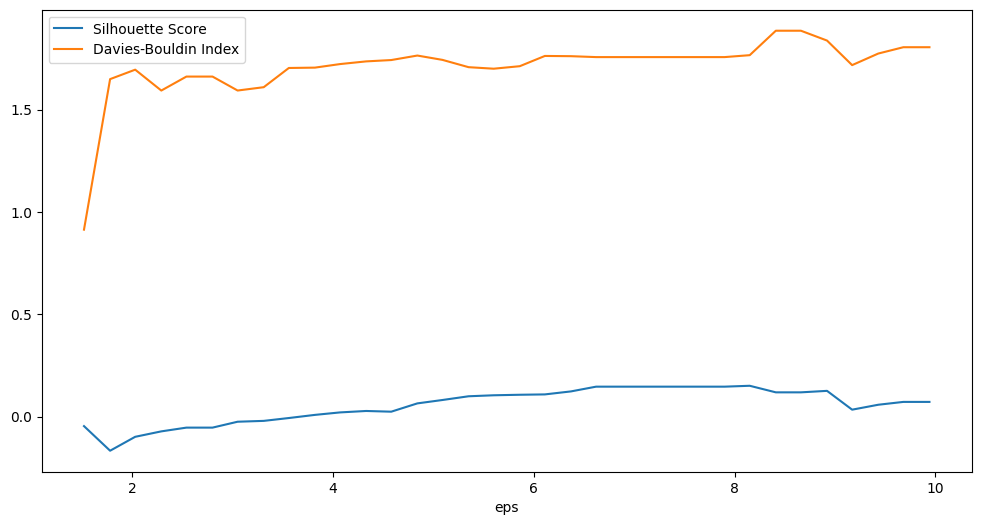

In [102]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

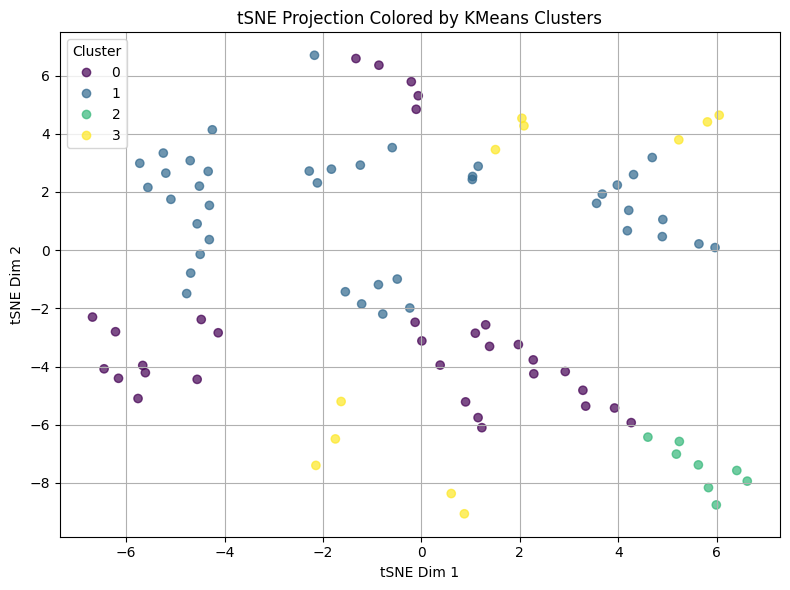

In [103]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        27    152          0.300095              0.659365
1   0.07            2        19     87          0.173800              0.799303
2   0.09            2         9     54         -0.297523              1.212799
3   0.11            2         8     34         -0.010323              0.742942
4   0.13            2         4     25          0.353489              0.381843
5   0.15            2         3     20          0.371110              0.425443
6   0.17            2         3     17          0.385549              0.436240
7   0.19            2         3     11          0.368548              0.479496
8   0.21            2         2     10          0.361634              0.599511
9   0.22            2         1     10               NaN                   NaN
10  0.24            2         1      9               NaN                   NaN
11  0.26            2         1      9               NaN                   NaN
12  0.28            2         2      6          0.313090              0.888722
13  0.30            2         1      6               NaN                   NaN
14  0.32            2         1      6               NaN                   NaN
15  0.34            2         1      6               NaN                   NaN
16  0.36            2         2      4          0.810978              0.198107
17  0.38            2         2      4          0.810978              0.198107
18  0.40            2         2      4          0.810978              0.198107
19  0.42            2         2      4          0.810978              0.198107
20  0.44            2         2      4          0.810978              0.198107
21  0.46            2         2      3          0.817655              0.219004
22  0.48            2         2      3          0.817655              0.219004
23  0.50            2         2      2          0.808215              0.264692
24  0.52            2         2      2          0.808215              0.264692
25  0.53            2         2      2          0.808215              0.264692
26  0.55            2         2      2          0.808215              0.264692
27  0.57            2         2      2          0.808215              0.264692
28  0.59            2         2      2          0.808215              0.264692
29  0.61            2         2      2          0.808215              0.264692
30  0.63            2         2      2          0.808215              0.264692
31  0.65            2         2      2          0.808215              0.264692
32  0.67            2         2      2          0.808215              0.264692
33  0.69            2         2      2          0.808215              0.264692
34  0.71            2         2      2          0.808215              0.264692
35  0.73            2         2      2          0.808215              0.264692
36  0.75            2         2      2          0.808215              0.264692
37  0.77            2         2      2          0.808215              0.264692
38  0.79            2         2      2          0.808215              0.264692
39  0.81            2         2      2          0.808215              0.264692
40  0.83            2         2      2          0.808215              0.264692
41  0.84            2         2      2          0.808215              0.264692
42  0.86            2         2      2          0.808215              0.264692
43  0.88            2         2      2          0.808215              0.264692
44  0.90            2         2      2          0.808215              0.264692
45  0.92            2         2      2          0.808215              0.264692
46  0.94            2         2      2          0.808215              0.264692
47  0.96            2         2      2          0.808215              0.264692
48  0.98            2         2      2          0.808215              0.264692
49  1.00            2         1      2               Na

<Axes: xlabel='eps'>

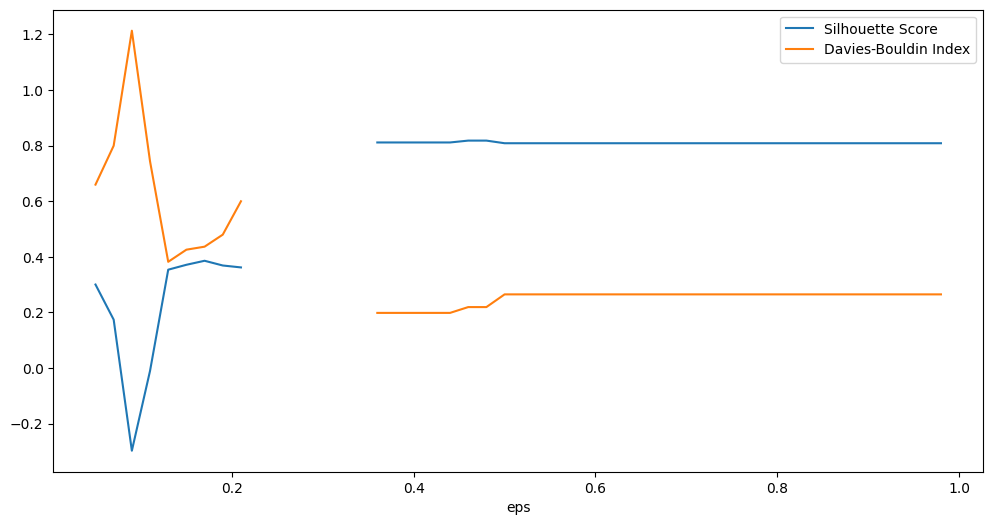

In [104]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [105]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [106]:
#Start with spring and work our way down to winter
season = 3
season_year = 2021
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2021-09-01 to 2021-11-30
Columns: 374 entries, 10000009 to 9000451
dtypes: float64(374)
memory usage: 266.6 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2021-09-01  0.505904  0.413230  0.084832  0.550593  0.266872  0.370983   
2021-09-02  0.507487  0.416358  0.087680  0.545665  0.268262  0.372159   
2021-09-03  0.508942  0.417071  0.091763  0.537462  0.269265  0.373008   
2021-09-04  0.500094  0.416377  0.092079  0.524281  0.265120  0.369501   
2021-09-05  0.484630  0.411290  0.091427  0.518670  0.261400  0.366354   
...              ...       ...       ...       ...       ...       ...   
2021-11-26  0.853247  0.638278  0.308563  0.853056  0.486976  0.557190   
2021-11-27  0.907179  0.874970  0.890706  1.005230  0.757734  0.786250   
2021-11-28  1.531225  1.390548  2.871020  1.306784  1.126734  1.098421   
2021-11-29  2.400696  1.692500  3.701397  1.596852  1.189361  1.151403   
2021-11-30  2.705412  1.106053  2.026340  1.394590  0.713888  0.749155   

             1000102   1000315  11000011  11000016  ...  67000018  67000019  \
2021-09-01  0.118237  0.208401  

          2021-09-01  2021-09-02  2021-09-03  2021-09-04  2021-09-05  \
10000009   -0.040529   -0.039864   -0.039475   -0.039370   -0.040061   
10000010   -0.050746   -0.049897   -0.049642   -0.048725   -0.048297   
10000011   -0.086950   -0.086083   -0.085641   -0.084964   -0.084222   
10000014   -0.035602   -0.035661   -0.036319   -0.036667   -0.036237   
10000016   -0.066881   -0.066202   -0.065998   -0.065628   -0.065132   
...              ...         ...         ...         ...         ...   
8000001    -0.069970   -0.069252   -0.068468   -0.067108   -0.066584   
9000015    -0.004613   -0.004173   -0.005551   -0.005948   -0.007525   
9000172    -0.059784   -0.053208   -0.045327   -0.054990   -0.060944   
9000293    -0.092000   -0.091723   -0.091517   -0.091530   -0.091268   
9000451    -0.087669   -0.087386   -0.087720   -0.087665   -0.087405   

          2021-09-06  2021-09-07  2021-09-08  2021-09-09  2021-09-10  ...  \
10000009   -0.040219   -0.039814   -0.039590   -0.039747  

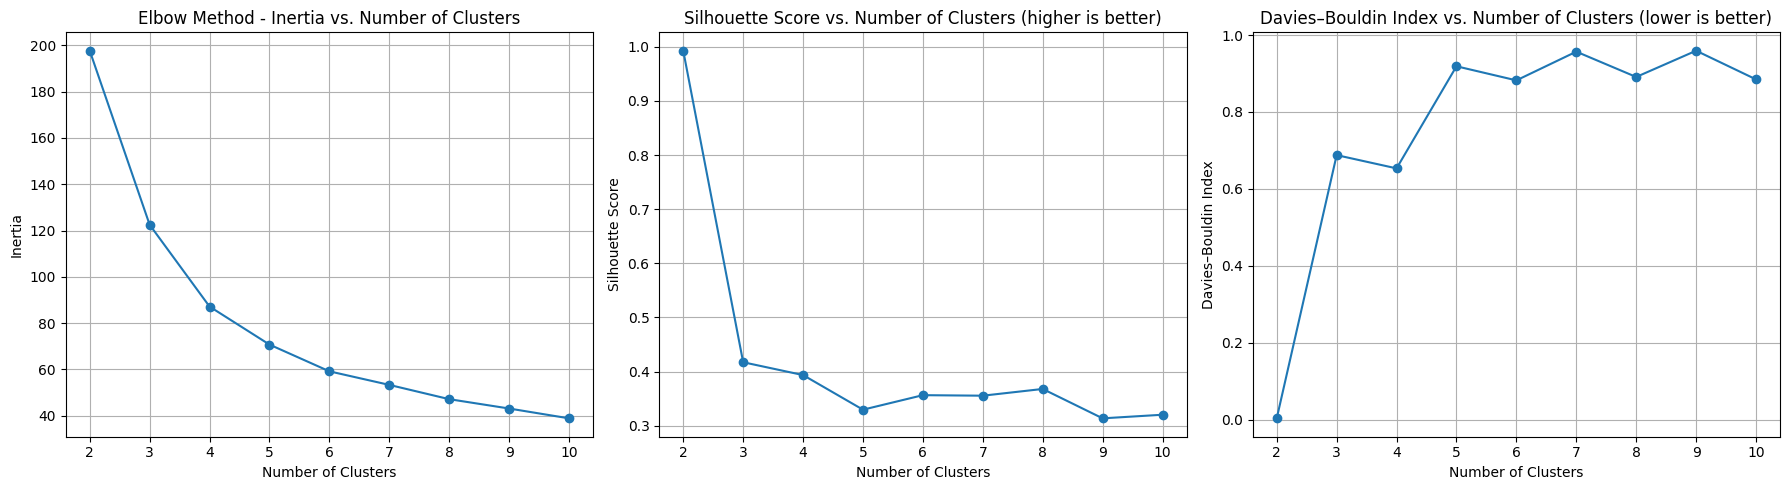

In [107]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        2
10000014        2
10000016        2

            10000009  10000010  10000011  10000014  10000016  10000017  \
2021-09-01  0.505904  0.413230  0.084832  0.550593  0.266872  0.370983   
2021-09-02  0.507487  0.416358  0.087680  0.545665  0.268262  0.372159   
2021-09-03  0.508942  0.417071  0.091763  0.537462  0.269265  0.373008   
2021-09-04  0.500094  0.416377  0.092079  0.524281  0.265120  0.369501   
2021-09-05  0.484630  0.411290  0.091427  0.518670  0.261400  0.366354   
...              ...       ...       ...       ...       ...       ...   
2021-11-26  0.853247  0.638278  0.308563  0.853056  0.486976  0.557190   
2021-11-27  0.907179  0.874970  0.890706  1.005230  0.757734  0.786250   
2021-11-28  1.531225  1.390548  2.871020  1.306784  1.126734  1.098421   
2021-11-29  2.400696  1.692500  3.701397  1.596852  1.189361  1.151403   
2021-11-30  2.705412  1.106053  2.026340  1.394590  0.713888  0.749155   

             1000102   1000315  11000011  11000016  ...  67000018  67000019  \
2021-09-01  0.118237  0.208401  

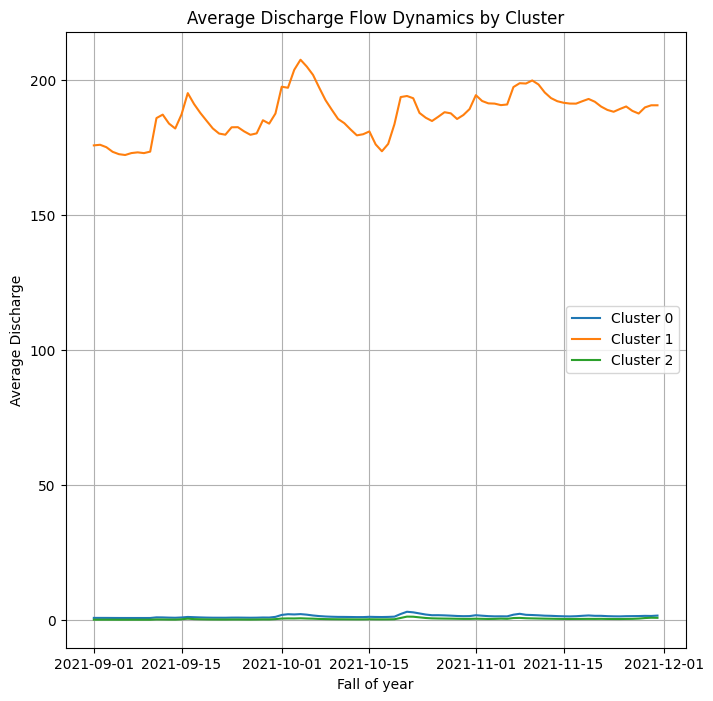

In [108]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [110]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2021-09-01  0.505904  0.413230  0.084832  0.550593  0.266872  0.370983   
2021-09-02  0.507487  0.416358  0.087680  0.545665  0.268262  0.372159   
2021-09-03  0.508942  0.417071  0.091763  0.537462  0.269265  0.373008   
2021-09-04  0.500094  0.416377  0.092079  0.524281  0.265120  0.369501   
2021-09-05  0.484630  0.411290  0.091427  0.518670  0.261400  0.366354   
...              ...       ...       ...       ...       ...       ...   
2021-11-26  0.853247  0.638278  0.308563  0.853056  0.486976  0.557190   
2021-11-27  0.907179  0.874970  0.890706  1.005230  0.757734  0.786250   
2021-11-28  1.531225  1.390548  2.871020  1.306784  1.126734  1.098421   
2021-11-29  2.400696  1.692500  3.701397  1.596852  1.189361  1.151403   
2021-11-30  2.705412  1.106053  2.026340  1.394590  0.713888  0.749155   

             1000102   1000315  11000011  11000016  ...  67000018  67000019  \
2021-09-01  0.118237  0.208401  0.533501  0.521290  ...  0.018652  0.023879   
2021-09-02  0.119436  0.209444  0.526638  0.517947  ...  0.011238  0.016113   
2021-09-03  0.119318  0.209341  0.520313  0.510199  ...  0.007940  0.012403   
2021-09-04  0.116316  0.206731  0.506974  0.497698  ...  0.018024  0.031441   
2021-09-05  0.115686  0.206184  0.493751  0.483970  ...  0.012329  0.030541   
...              ...       ...       ...       ...  ...       ...       ...   
2021-11-26  0.964552  0.944039  1.319349  1.011986  ...  1.140010  1.330847   
2021-11-27  0.976452  0.954383  1.306820  0.983777  ...  1.553751  1.932961   
2021-11-28  1.050017  1.018328  1.277477  0.974337  ...  2.171984  2.839997   
2021-11-29  1.264830  1.205049  1.248768  1.039246  ...  3.367022  3.801879   
2021-11-30  1.161111  1.114893  1.264517  1.479605  ...  3.595240  4.073172   

            67000030   7000003   7000333   8000001   9000015   9000172  \
2021-09-01  0.049119  0.167396  0.110126  0.238850  0.831683  0.331247   
2021-09-02  0.052016  0.169382  0.108910  0.240554  0.831664  0.386282   
2021-09-03  0.051923  0.170215  0.108481  0.246950  0.815503  0.456068   
2021-09-04  0.078962  0.168069  0.105623  0.251870  0.799175  0.360308   
2021-09-05  0.051657  0.165564  0.100845  0.248468  0.774321  0.298688   
...              ...       ...       ...       ...       ...       ...   
2021-11-26  0.658434  0.754684  0.604749  0.829714  1.321134  1.481848   
2021-11-27  1.031241  0.857912  0.686963  0.853879  1.131793  1.561441   
2021-11-28  1.273897  1.115993  1.279365  1.208723  1.077271  2.016105   
2021-11-29  2.224966  1.629955  1.520978  1.952367  1.066428  1.857450   
2021-11-30  2.521356  1.407358  1.169334  1.685798  1.204499  1.772294   

             9000293   9000451  
2021-09-01  0.039020  0.078303  
2021-09-02  0.036455  0.075845  
2021-09-03  0.038662  0.072979  
2021-09-04  0.033325  0.067916  
2021-09-05  0.028688  0.063092  
...              ...       ...  
2021-11-26  0.886840  0.709290  
2021-11-27  0.817275  0.678228  
2021-11-28  0.783697  0.673194  
2021-11-29  0.764191  0.789381  
2021-11-30  1.321407  0.888532  

[91 rows x 374 columns]

<Axes: >

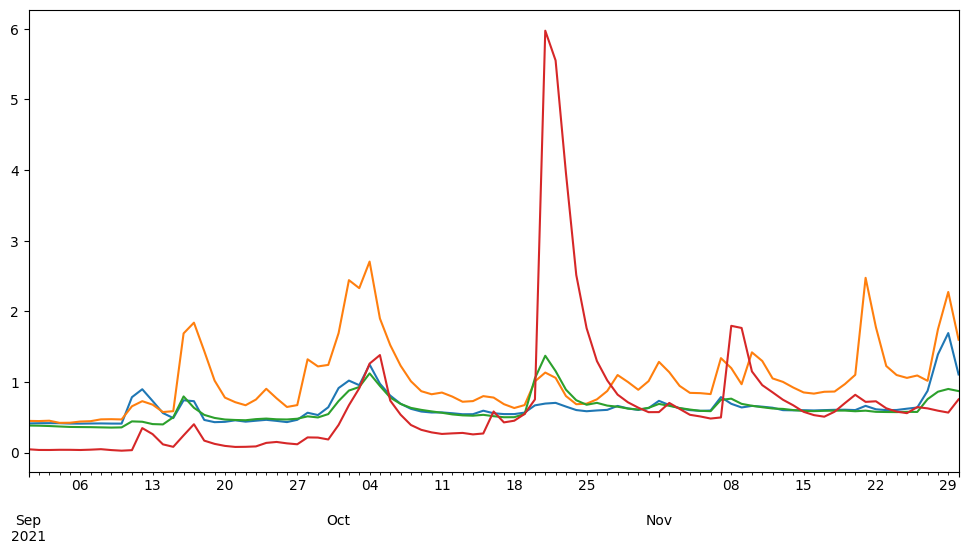

In [111]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

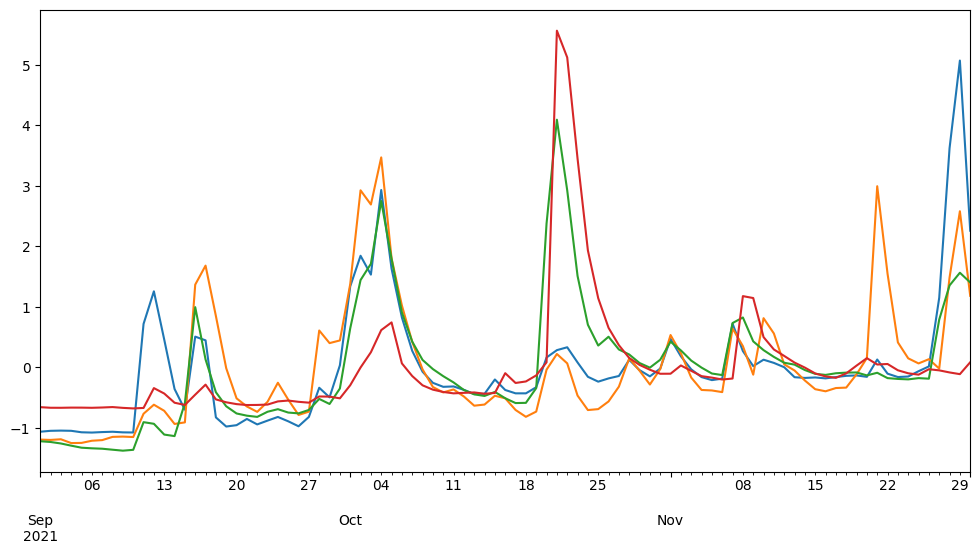

In [112]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

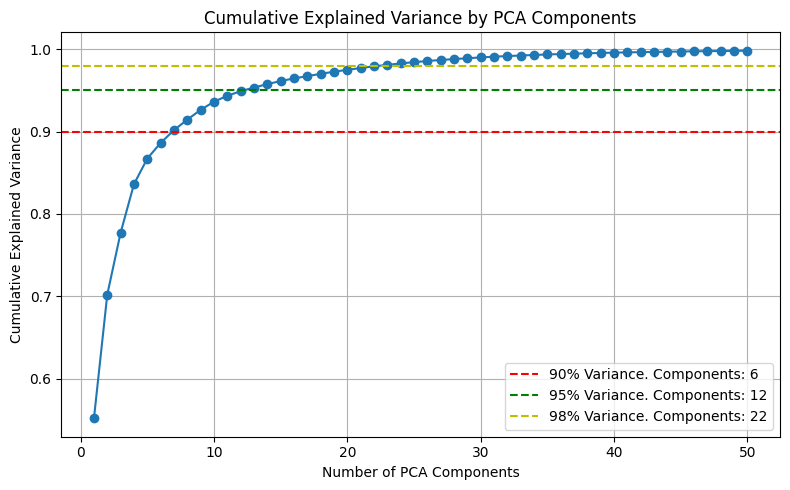

In [113]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [114]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-17.70812359,  -5.89979027,  -1.20991529, ...,  -0.16224464,
         -0.29020187,  -0.07933858],
       [-18.22042102,  -5.57934918,  -1.48718879, ...,  -0.37406529,
         -0.3526788 ,   0.03378714],
       [-18.4414435 ,  -5.69428679,  -1.56888401, ...,  -0.20568888,
          0.24590245,   0.18266806],
       ...,
       [ 16.59575922,   7.22947904,   7.0715862 , ...,   1.95168306,
         -0.72307079,  -1.6219328 ],
       [ 19.49373914,  11.01958089,   8.02387826, ...,  -1.81106345,
          2.5063391 ,  -0.21276649],
       [ 21.43081212,   5.74288135,   8.14016656, ...,  -0.34551903,
         -1.17220029,   1.81245261]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37396\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


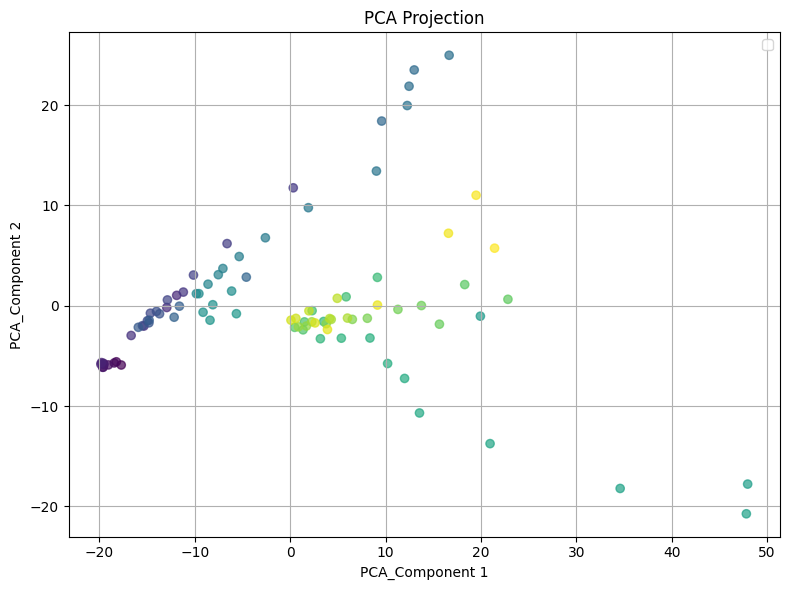

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37396\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


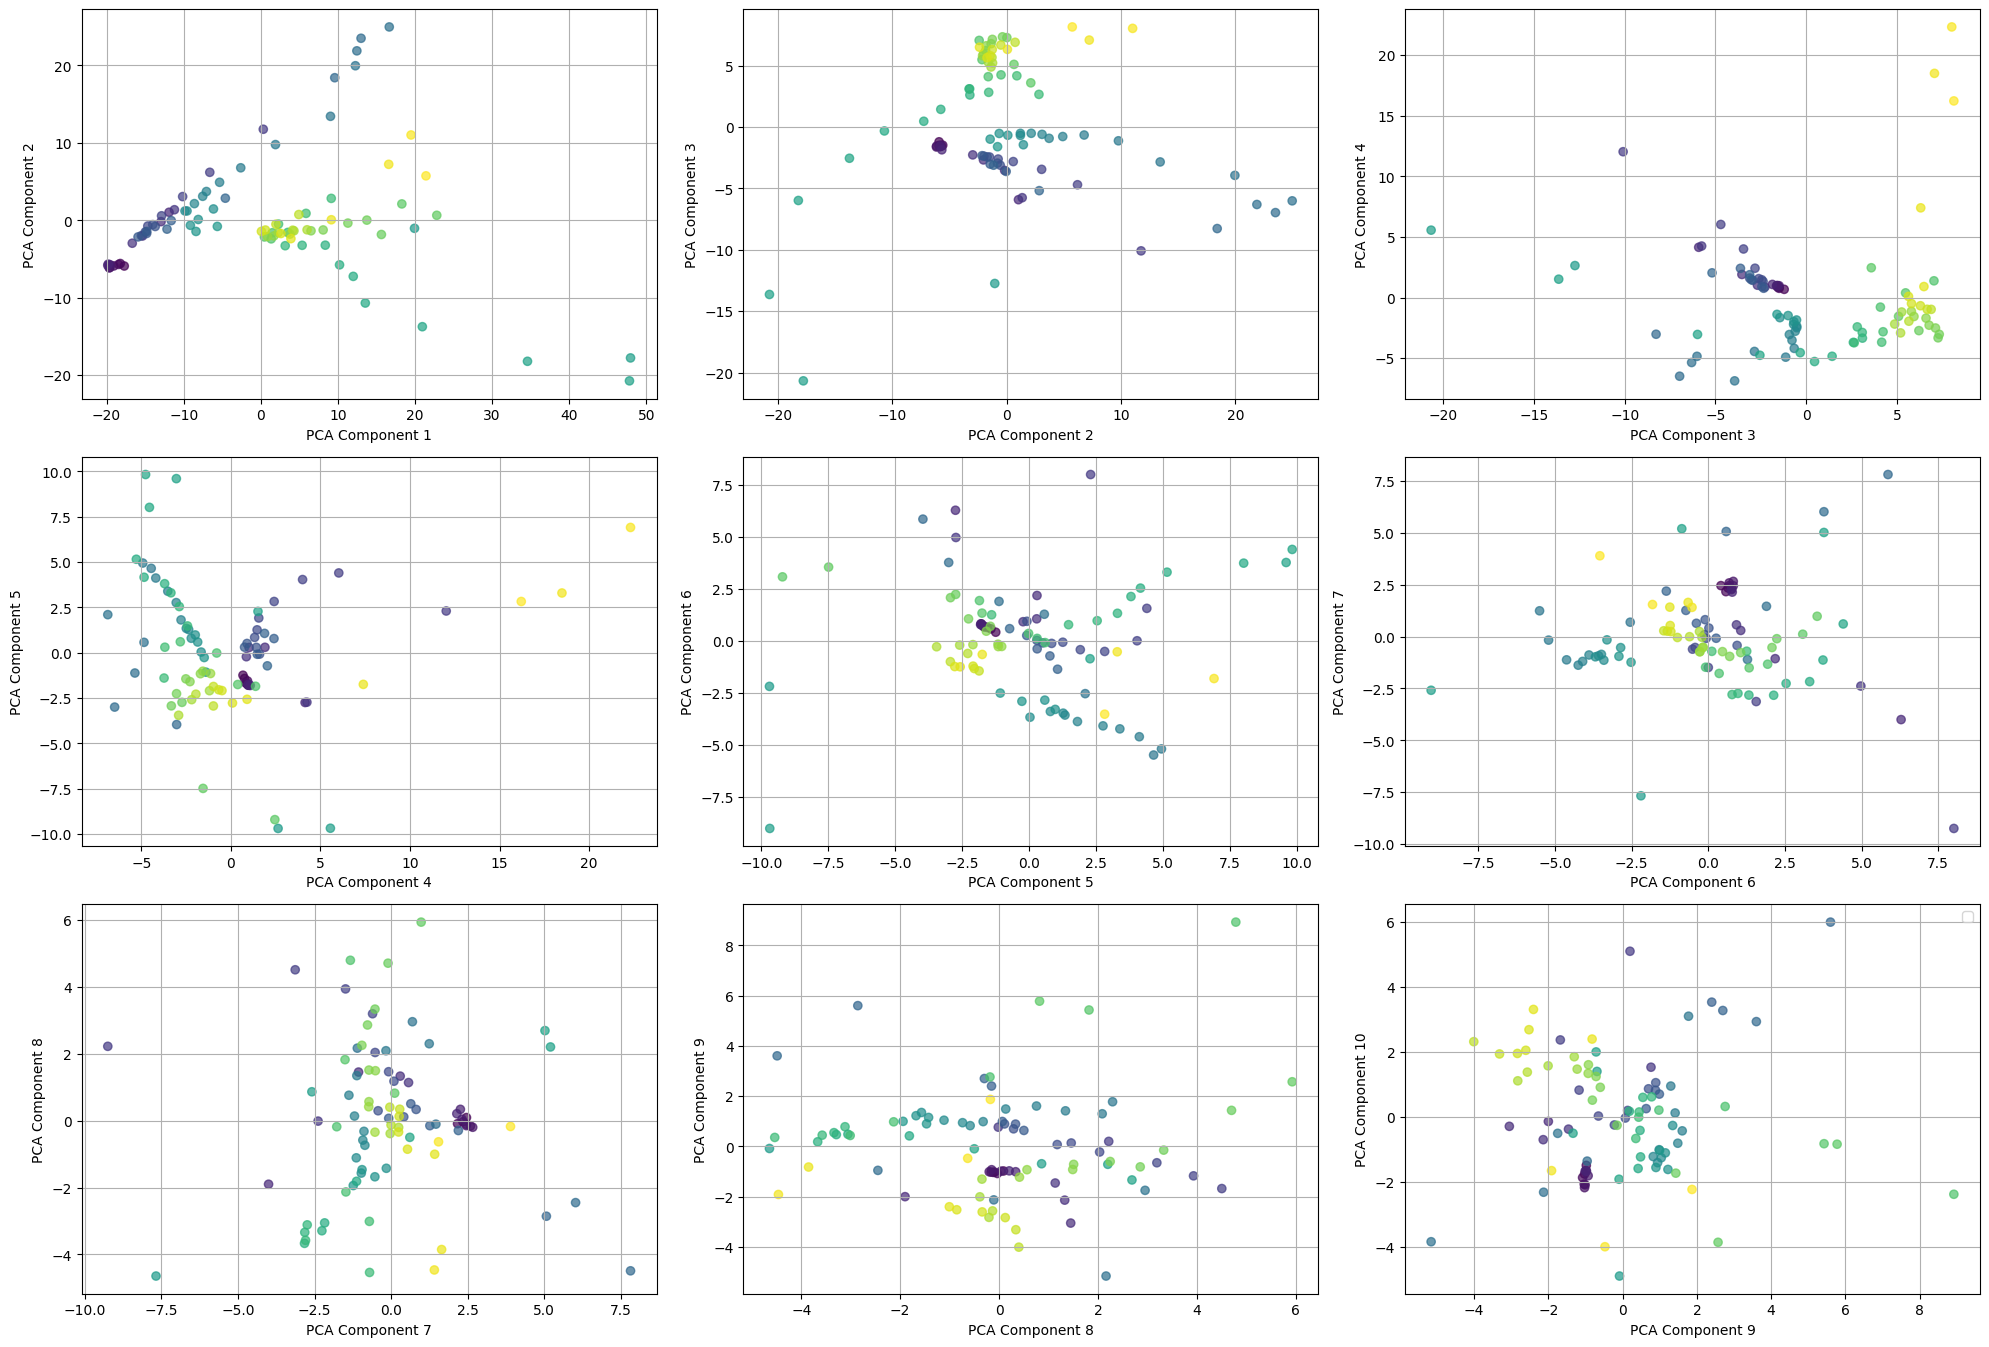

In [116]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [117]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.426
KMeans Davies-Bouldin Index is 0.827


<Axes: xlabel='k'>

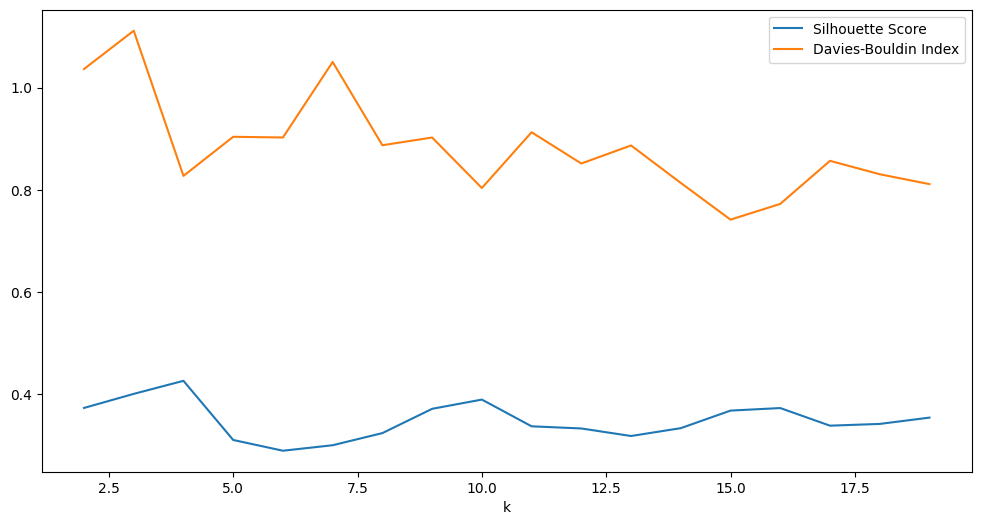

In [118]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         1     88               NaN   
2    1.01            3         1     84               NaN   
3    1.27            3         1     81               NaN   
4    1.52            3         1     81               NaN   
5    1.78            3         1     81               NaN   
6    2.03            3         3     74         -0.049859   
7    2.29            3         5     67          0.005311   
8    2.54            3         5     62         -0.085157   
9    2.80            3         8     52         -0.015759   
10   3.05            3         7     50          0.027472   
11   3.31            3         6     48          0.046043   
12   3.56            3         6     46          0.069242   
13   3.82            3         5     42          0.133297   
14   4.07            3         5     36          0.168984   
15   4.33            3         5     36          0.168984   
16   4.58            3         5     34          0.182919   
17   4.84            3         5     31          0.210781   
18   5.09            3         5     29          0.215436   
19   5.35            3         5     28          0.220556   
20   5.60            3         4     28          0.204585   
21   5.86            3         4     25          0.227627   
22   6.11            3         3     24          0.270444   
23   6.37            3         3     23          0.277248   
24   6.62            3         3     21          0.279284   
25   6.88            3         3     21          0.279284   
26   7.13            3         3     21          0.279284   
27   7.39            3         3     21          0.279284   
28   7.64            3         3     21          0.279284   
29   7.90            3         3     21          0.279284   
30   8.15            3         3     21          0.279284   
31   8.41            3         4     18          0.291442   
32   8.66            3         4     17          0.304066   
33   8.92            3         4     17          0.304066   
34   9.17            3         3     15          0.357600   
35   9.43            3         3     15          0.357600   
36   9.68            3         3     15          0.357600   
37   9.94            3         3     15          0.357600   
38  10.19            3         3     13          0.378051   
39  10.45            3         3     13          0.378051   
40  10.70            3         3     13          0.378051   
41  10.96            3         2     13          0.312419   
42  11.21            3         2     12          0.318443   
43  11.47            3         1     12               NaN   
44  11.72            3         1      9               NaN   
45  11.98            3         1      9               NaN   
46  12.23            3         1      9               NaN   
47  12.49            3         2      6          0.406658   
48  12.74            3         2      5          0.406133   
49  13.00            3         2      5          0.406133   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6               1.194590  
7               1.019514  
8               1.391597  
9               1.684113  
10              1.750831  
11              1.723546  
12              1.685814  
13              1.712811  
14              1.658119  
15              1.658119  
16              1.614543  
17              1.667941  
18              1.657658  
19              1.693313  
20              1.869639  
21              1.736251  
22              1.716974  
23              1.663532  
24              1.561306  
25              1.561306  
26              1.561306  
27              1.561306  
28              1.561306  
29              1.561306  
30              1.561306  
31              1.527486  
32 

<Axes: xlabel='eps'>

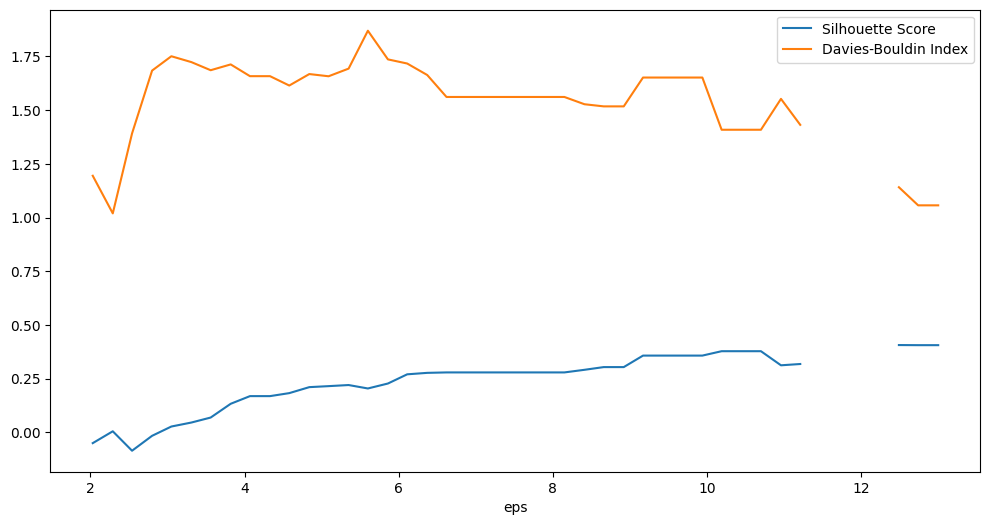

In [119]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

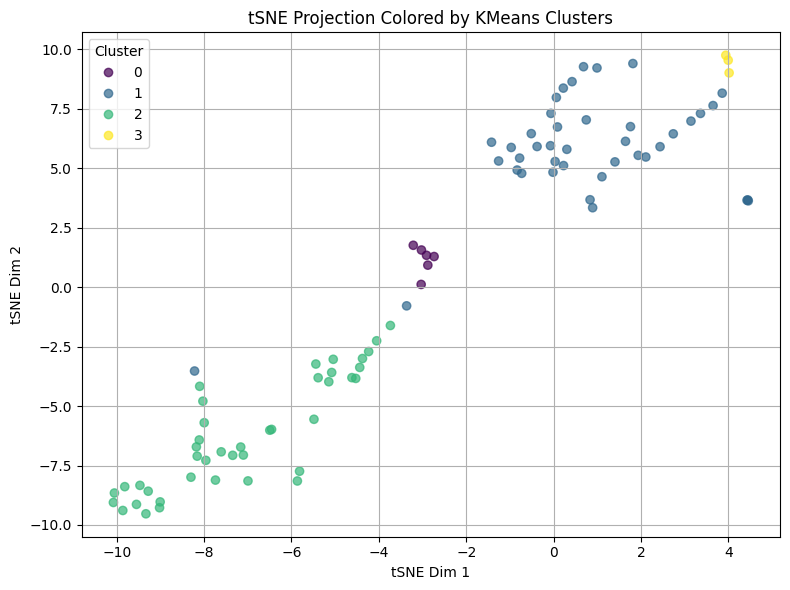

In [120]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        23    249          0.336593   
1    0.05            2        24    231          0.349899   
2    0.06            2        30    210          0.343327   
3    0.06            2        31    201          0.451223   
4    0.07            2        33    191          0.453924   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.718358   
196  0.99            2         2      2          0.718358   
197  0.99            2         2      2          0.718358   
198  1.00            2         2      2          0.718358   
199  1.00            2         2      2          0.718358   

     Davies-Bouldin Index  
0                0.516119  
1                0.473222  
2                0.475311  
3                0.456375  
4                0.444813  
..                    ...  
195              0.392449  
196              0.392449  
197              0.392449  
198              0.392449  
199              0.392449  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

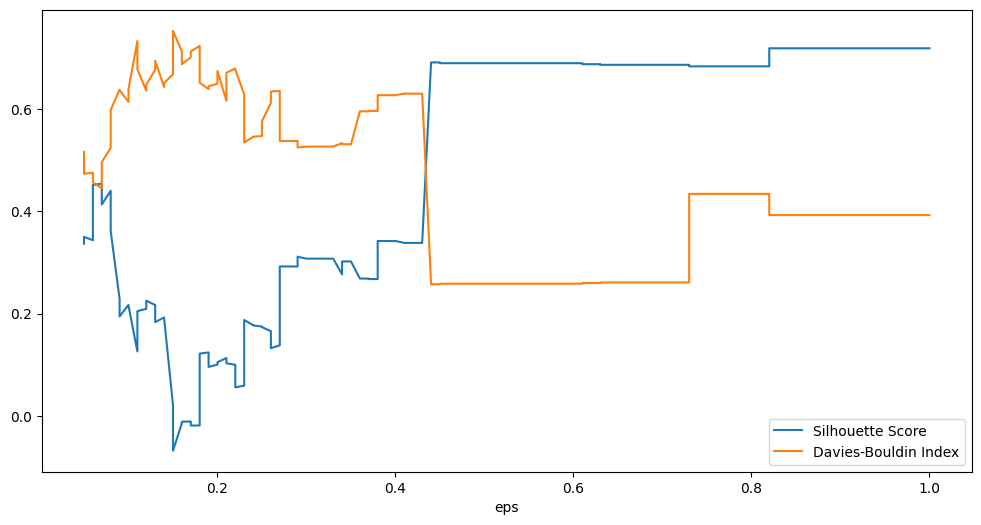

In [121]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [122]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [123]:
season = 4
season_year = 2021
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2021-12-01 to 2022-02-28
Columns: 348 entries, 10000009 to 9000451
dtypes: float64(348)
memory usage: 245.4 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2021-12-01  1.928948  1.030860  1.953335  1.325431  0.734886  0.766920   
2021-12-02  1.796260  1.033130  3.206335  1.366118  0.776828  0.802402   
2021-12-03  1.634320  0.970354  1.639769  1.231012  0.641523  0.687935   
2021-12-04  1.543636  0.911631  1.167350  1.182046  0.643648  0.689733   
2021-12-05  1.669796  0.988806  1.376338  1.267309  0.742365  0.773247   
...              ...       ...       ...       ...       ...       ...   
2022-02-24  1.949857  1.379635  1.815340  1.778936  1.026726  1.214495   
2022-02-25  1.848504  1.260267  1.553090  1.627780  0.927669  1.089684   
2022-02-26  1.514385  1.101981  1.252561  1.421129  0.796245  0.924090   
2022-02-27  1.279953  1.035189  1.061757  1.292749  0.750868  0.866916   
2022-02-28  1.180189  1.005659  0.956588  1.213736  0.727019  0.836867   

             1000102   1000315  11000011  11000016  ...   66000034   67000017  \
2021-12-01  1.250828  1.192878

          2021-12-01  2021-12-02  2021-12-03  2021-12-04  2021-12-05  \
10000009    0.155507   -0.279391   -0.245268   -0.435086   -0.258206   
10000010   -0.575889   -0.807122   -0.848331   -0.857435   -0.714301   
10000011    0.175368    0.695727   -0.240319   -0.686546   -0.454750   
10000014   -0.335992   -0.576849   -0.611582   -0.676725   -0.527773   
10000016   -0.816928   -0.984364   -1.146999   -1.036519   -0.879355   
...              ...         ...         ...         ...         ...   
8000001     0.000963   -0.264320   -0.009889   -0.201640    0.056130   
9000015    -0.365301   -0.624625   -0.106179   -0.113434   -0.133200   
9000172     0.096185   -0.249603   -0.332416   -0.524874   -0.522258   
9000293    -0.038386   -0.172213    1.361304    1.393049    0.968547   
9000451    -0.681755   -1.157577   -1.097766   -0.681279   -0.513750   

          2021-12-06  2021-12-07  2021-12-08  2021-12-09  2021-12-10  ...  \
10000009    0.026437   -0.142511   -0.204561    0.107934  

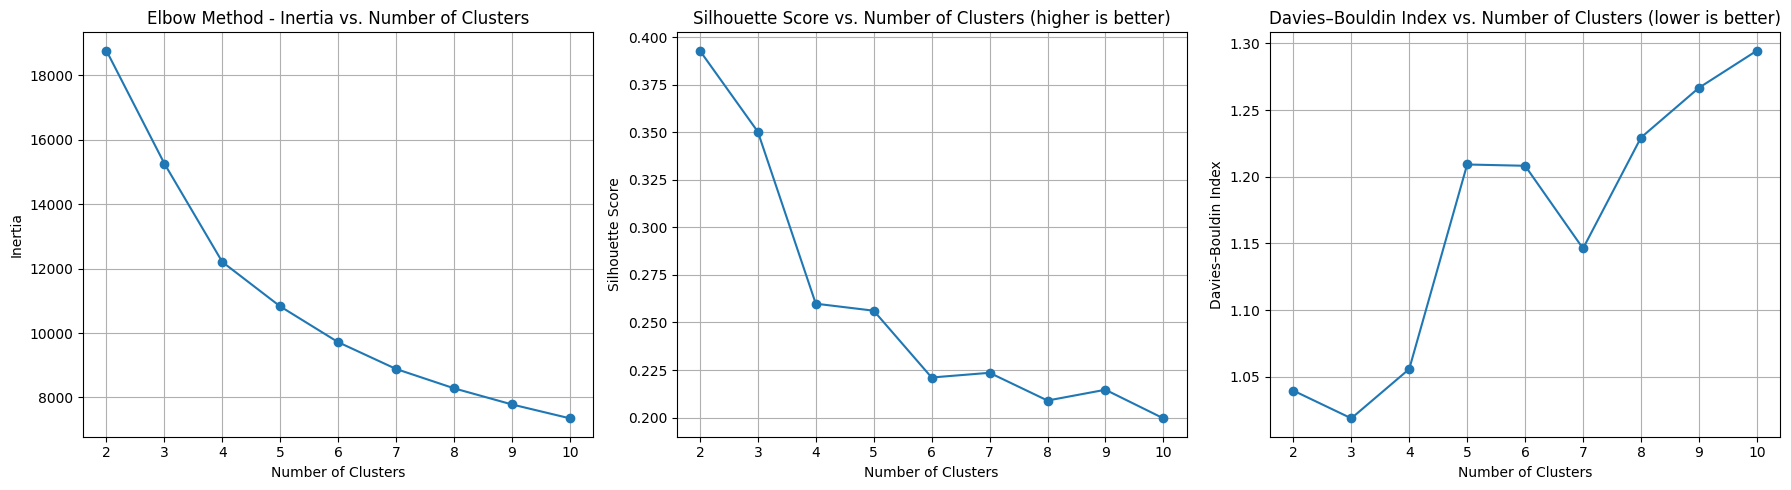

In [124]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        1
10000011        1
10000014        1
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2021-12-01  1.928948  1.030860  1.953335  1.325431  0.734886  0.766920   
2021-12-02  1.796260  1.033130  3.206335  1.366118  0.776828  0.802402   
2021-12-03  1.634320  0.970354  1.639769  1.231012  0.641523  0.687935   
2021-12-04  1.543636  0.911631  1.167350  1.182046  0.643648  0.689733   
2021-12-05  1.669796  0.988806  1.376338  1.267309  0.742365  0.773247   
...              ...       ...       ...       ...       ...       ...   
2022-02-24  1.949857  1.379635  1.815340  1.778936  1.026726  1.214495   
2022-02-25  1.848504  1.260267  1.553090  1.627780  0.927669  1.089684   
2022-02-26  1.514385  1.101981  1.252561  1.421129  0.796245  0.924090   
2022-02-27  1.279953  1.035189  1.061757  1.292749  0.750868  0.866916   
2022-02-28  1.180189  1.005659  0.956588  1.213736  0.727019  0.836867   

             1000102   1000315  11000011  11000016  ...   66000034   67000017  \
2021-12-01  1.250828  1.192878

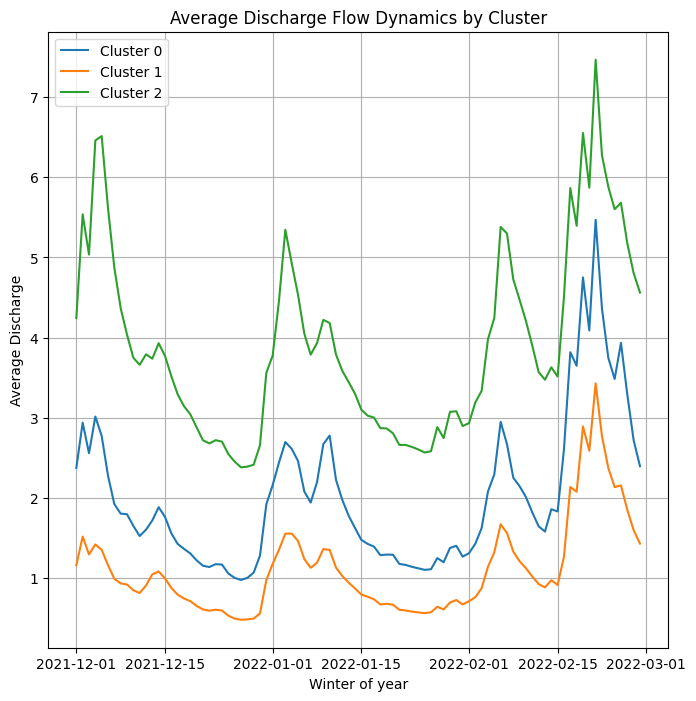

In [125]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [127]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2021-12-01  1.928948  1.030860  1.953335  1.325431  0.734886  0.766920   
2021-12-02  1.796260  1.033130  3.206335  1.366118  0.776828  0.802402   
2021-12-03  1.634320  0.970354  1.639769  1.231012  0.641523  0.687935   
2021-12-04  1.543636  0.911631  1.167350  1.182046  0.643648  0.689733   
2021-12-05  1.669796  0.988806  1.376338  1.267309  0.742365  0.773247   
...              ...       ...       ...       ...       ...       ...   
2022-02-24  1.949857  1.379635  1.815340  1.778936  1.026726  1.214495   
2022-02-25  1.848504  1.260267  1.553090  1.627780  0.927669  1.089684   
2022-02-26  1.514385  1.101981  1.252561  1.421129  0.796245  0.924090   
2022-02-27  1.279953  1.035189  1.061757  1.292749  0.750868  0.866916   
2022-02-28  1.180189  1.005659  0.956588  1.213736  0.727019  0.836867   

             1000102   1000315  11000011  11000016  ...   66000034   67000017  \
2021-12-01  1.250828  1.192878  1.358018  1.693993  ...   3.104174   4.147723   
2021-12-02  1.168013  1.120893  1.404086  1.909746  ...   6.322463   9.462895   
2021-12-03  1.115942  1.075631  1.485400  1.965930  ...   4.437461   7.547864   
2021-12-04  1.084381  1.048198  1.590201  2.209178  ...   7.557746   9.560768   
2021-12-05  1.101003  1.062646  1.672648  2.353239  ...  10.246450  12.170390   
...              ...       ...       ...       ...  ...        ...        ...   
2022-02-24  2.116976  1.945755  2.891755  3.187126  ...   2.389067   2.996490   
2022-02-25  1.821831  1.689207  2.920767  2.894182  ...   1.890383   2.399317   
2022-02-26  1.325430  1.257723  2.881222  2.457111  ...   1.445397   1.946775   
2022-02-27  1.118475  1.077833  2.785020  2.180007  ...   1.200180   1.650168   
2022-02-28  0.961915  0.941747  2.674545  1.989429  ...   1.073096   1.469682   

             67000019   7000003   7000333   8000001   9000015   9000172  \
2021-12-01   5.387238  1.332887  1.139284  1.739181  1.289443  1.856105   
2021-12-02  11.592951  1.069387  1.250300  1.818053  1.297032  1.839335   
2021-12-03   9.645351  1.236809  1.266468  1.893470  1.787455  1.538371   
2021-12-04  14.959752  1.292988  1.160760  1.892968  2.024959  1.409278   
2021-12-05  15.566713  1.362794  1.202051  2.139127  1.856441  1.275543   
...               ...       ...       ...       ...       ...       ...   
2022-02-24   4.774474  3.410220  1.571399  3.277485  3.910094  1.798619   
2022-02-25   4.006872  3.084911  1.400696  2.884487  3.919293  1.589647   
2022-02-26   3.094948  2.655577  1.186617  2.381022  3.425093  1.344564   
2022-02-27   2.445914  2.276428  1.082096  2.034332  2.307460  1.219551   
2022-02-28   2.007492  2.000565  1.015441  1.813290  2.085146  1.141207   

             9000293   9000451  
2021-12-01  1.690865  0.900866  
2021-12-02  1.951245  0.526353  
2021-12-03  3.403140  0.695728  
2021-12-04  4.279274  1.175232  
2021-12-05  3.501445  1.288245  
...              ...       ...  
2022-02-24  2.340231  2.337913  
2022-02-25  2.184952  2.250883  
2022-02-26  2.056211  2.007127  
2022-02-27  1.971703  1.775796  
2022-02-28  1.878374  1.561882  

[90 rows x 348 columns]

<Axes: >

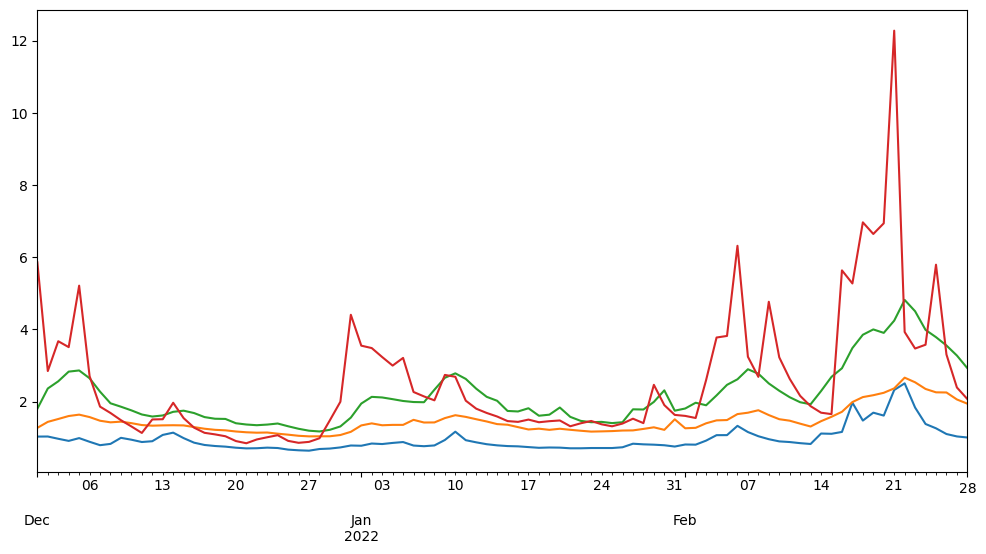

In [128]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

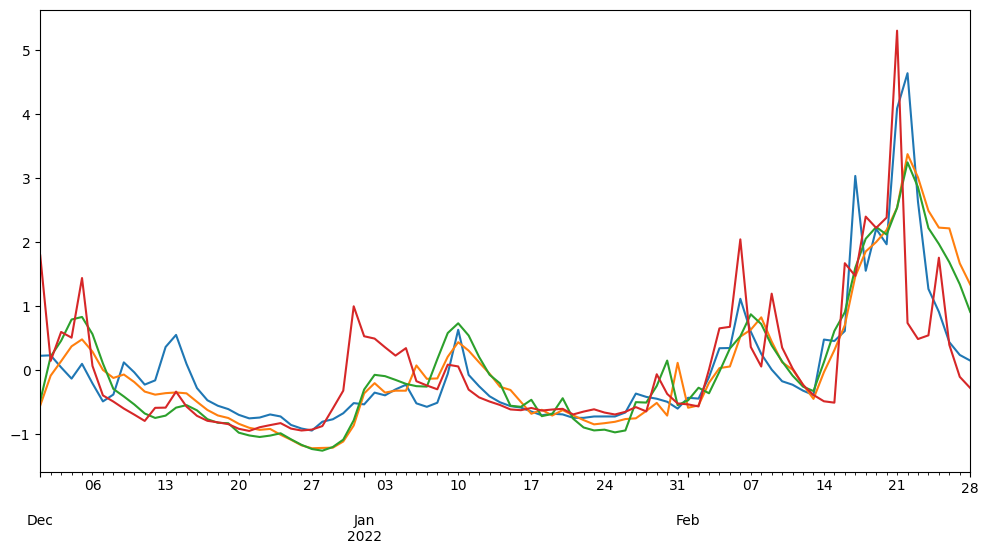

In [129]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

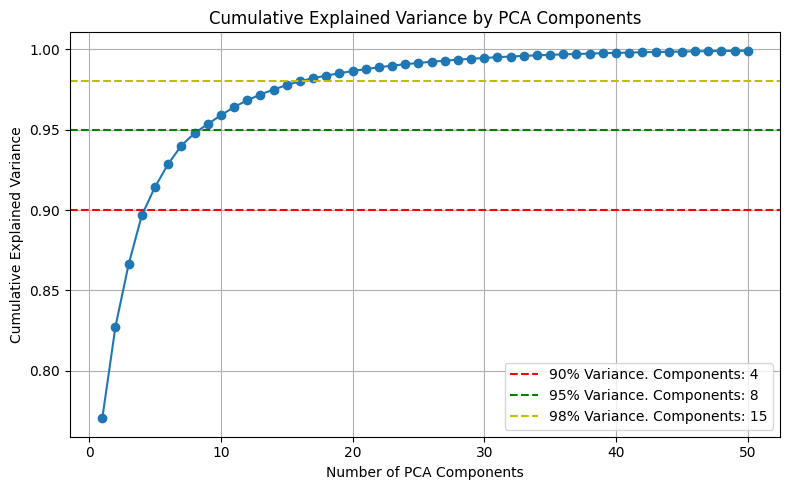

In [130]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [131]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[  1.56562438, -11.10396867,   2.83673941, ...,   1.02093879,
         -0.53827385,  -0.04904564],
       [ 11.95445016, -11.07531282,   9.74186782, ...,   0.16124715,
          0.56575256,  -0.30970277],
       [  6.16041681,  -5.53430017,   7.3720552 , ...,   0.0476066 ,
          1.98492916,  -0.02519981],
       ...,
       [ 23.53464859,  12.08633544,   1.41206347, ...,   1.13467761,
         -0.17562278,  -0.16484598],
       [ 15.37144714,  12.83305053,   0.62295447, ...,   0.28258085,
          0.18423194,  -0.80920396],
       [ 10.29019422,  12.03531505,  -0.29585451, ...,   1.16669954,
          0.64918433,  -1.48089709]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_37396\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


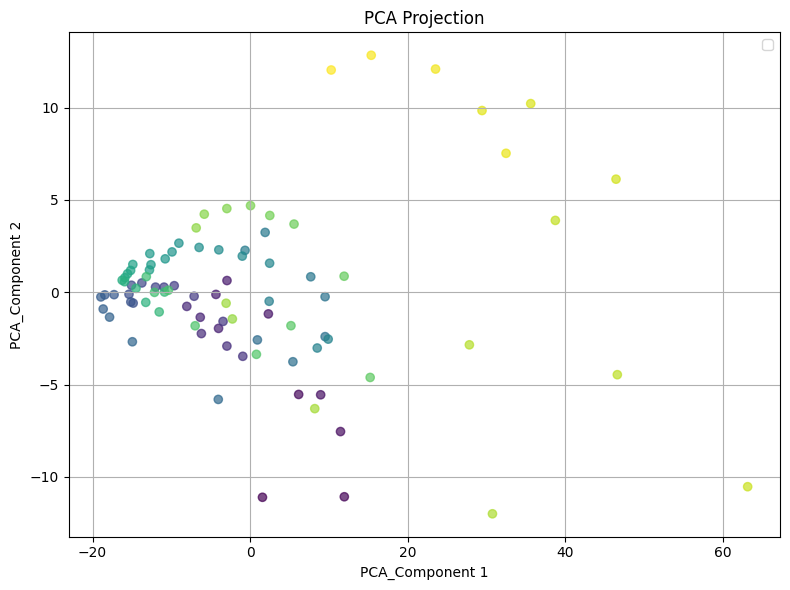

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_37396\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


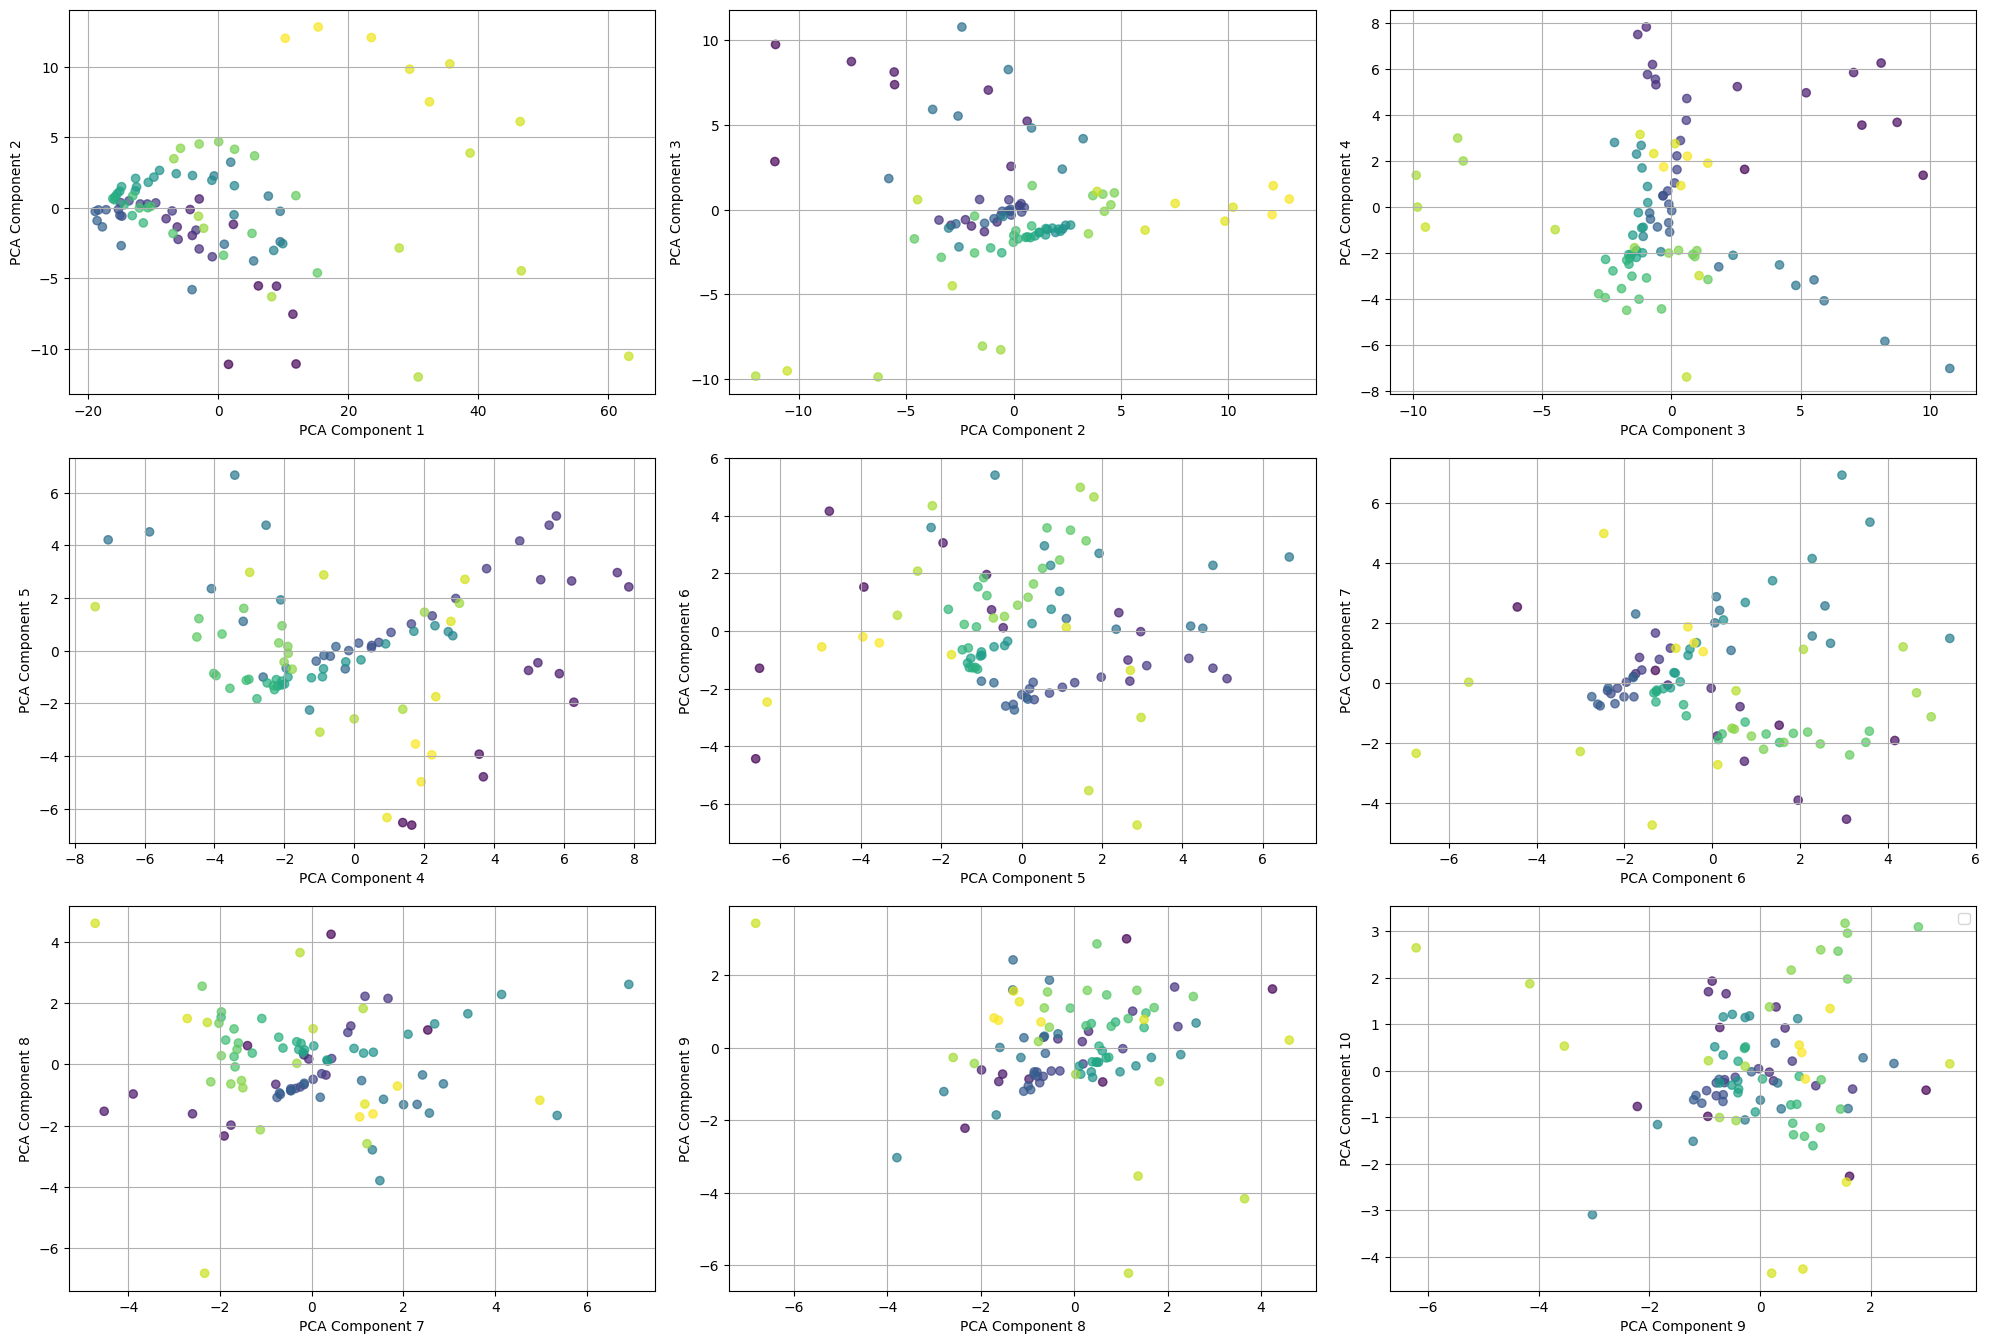

In [133]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [134]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.363
KMeans Davies-Bouldin Index is 1.405


<Axes: xlabel='k'>

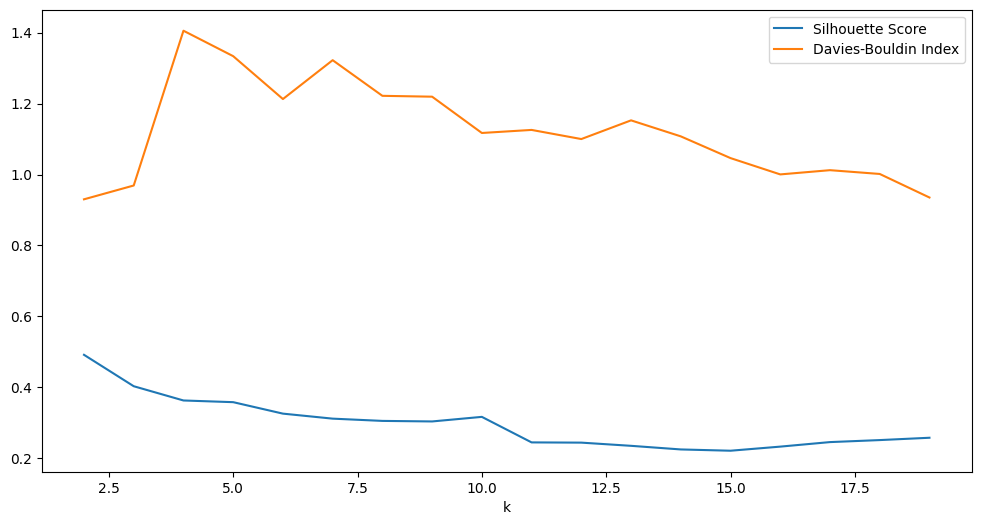

In [135]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         2     84         -0.164364   
3    1.27            3         2     80         -0.101229   
4    1.52            3         3     77         -0.058780   
5    1.78            3         3     74         -0.019312   
6    2.03            3         6     65         -0.027219   
7    2.29            3         5     65         -0.034729   
8    2.54            3         2     64          0.036054   
9    2.80            3         3     60          0.053057   
10   3.05            3         3     59          0.058668   
11   3.31            3         5     50          0.015213   
12   3.56            3         5     46          0.005516   
13   3.82            3         4     45          0.037162   
14   4.07            3         4     43          0.043900   
15   4.33            3         5     39          0.052879   
16   4.58            3         4     39          0.034764   
17   4.84            3         2     38          0.129103   
18   5.09            3         2     38          0.129103   
19   5.35            3         2     38          0.129103   
20   5.60            3         1     38               NaN   
21   5.86            3         1     38               NaN   
22   6.11            3         1     38               NaN   
23   6.37            3         1     36               NaN   
24   6.62            3         2     32          0.263931   
25   6.88            3         2     32          0.263931   
26   7.13            3         2     29          0.228780   
27   7.39            3         2     29          0.228780   
28   7.64            3         2     26          0.216733   
29   7.90            3         2     26          0.216733   
30   8.15            3         2     24          0.229056   
31   8.41            3         1     23               NaN   
32   8.66            3         1     22               NaN   
33   8.92            3         1     19               NaN   
34   9.17            3         2     16          0.353574   
35   9.43            3         2     14          0.353802   
36   9.68            3         2     14          0.353802   
37   9.94            3         2     11          0.442039   
38  10.19            3         2     11          0.442039   
39  10.45            3         2     11          0.442039   
40  10.70            3         2     11          0.442039   
41  10.96            3         2     11          0.442039   
42  11.21            3         2      9          0.467460   
43  11.47            3         2      9          0.467460   
44  11.72            3         2      9          0.467460   
45  11.98            3         2      9          0.467460   
46  12.23            3         2      8          0.468018   
47  12.49            3         2      8          0.468018   
48  12.74            3         2      7          0.483668   
49  13.00            3         2      7          0.483668   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               0.973283  
3               0.954922  
4               0.881478  
5               0.864200  
6               0.932537  
7               0.938126  
8               1.104891  
9               1.040846  
10              1.054456  
11              1.179439  
12              1.339918  
13              1.342353  
14              1.387409  
15              1.317416  
16              1.568409  
17              1.240925  
18              1.240925  
19              1.240925  
20                   NaN  
21                   NaN  
22                   NaN  
23                   NaN  
24              1.471287  
25              1.471287  
26              1.503375  
27              1.503375  
28              1.458080  
29              1.458080  
30              1.364975  
31                   NaN  
32 

<Axes: xlabel='eps'>

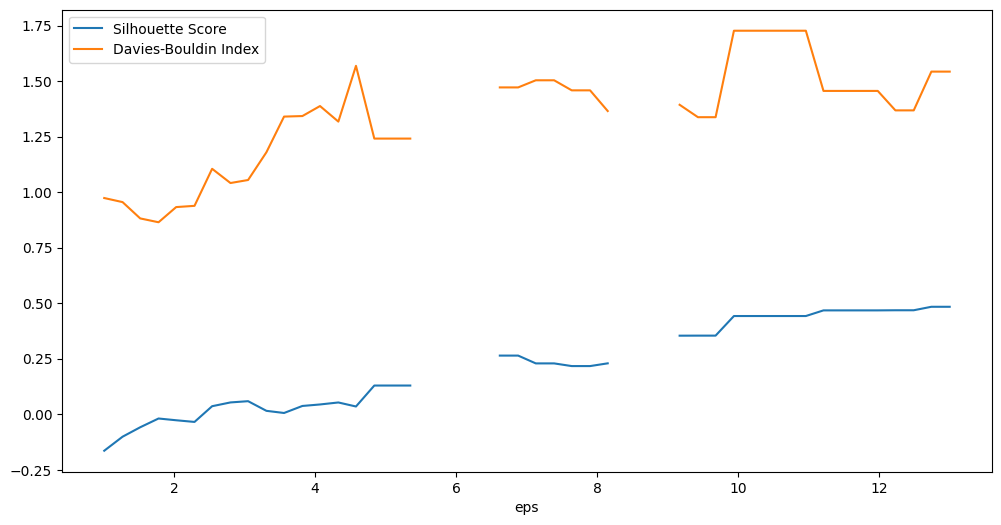

In [136]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

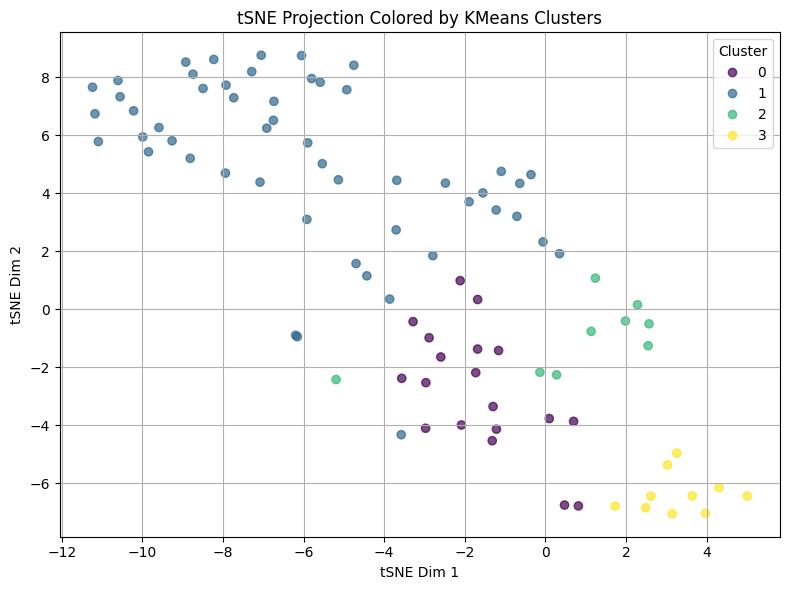

In [137]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         2    344          0.999783   
1    0.05            2         2    344          0.999783   
2    0.06            2         2    344          0.999783   
3    0.06            2         2    344          0.999783   
4    0.07            2         2    344          0.999783   
..    ...          ...       ...    ...               ...   
195  0.98            2        29    271          0.544319   
196  0.99            2        29    268          0.540999   
197  0.99            2        29    267          0.529152   
198  1.00            2        30    265          0.503905   
199  1.00            2        30    264          0.502233   

     Davies-Bouldin Index  
0                0.000217  
1                0.000217  
2                0.000217  
3                0.000217  
4                0.000217  
..                    ...  
195              0.511571  
196              0.500362  
197              0.509493  
198              0.545076  
199              0.557725  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

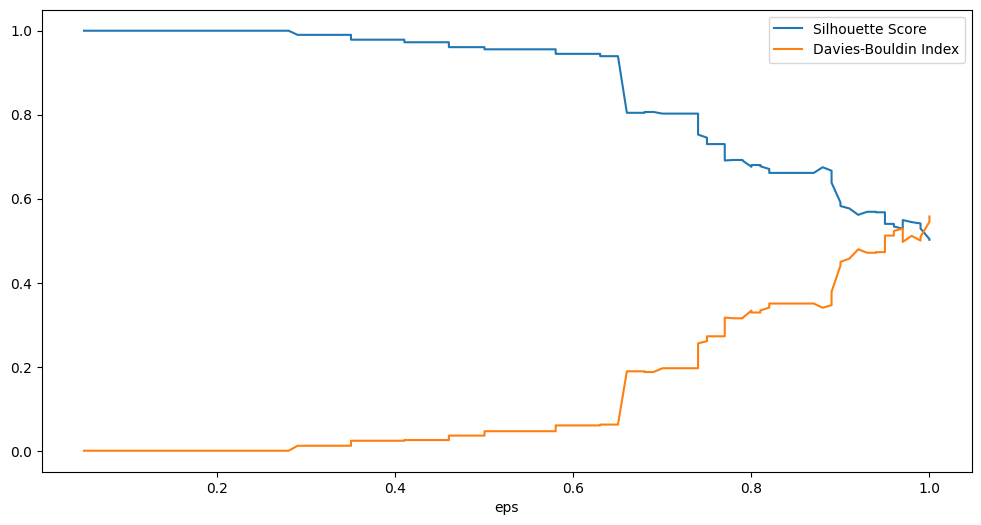

In [138]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))